In [1]:
import os
import sys
from pathlib import Path
base_dir = str(Path(Path.cwd()).resolve().parent.parent)
print(base_dir)
sys.path.append(base_dir)
import json

B:\data_science_projects\erdos_institute\aware-nlp


In [32]:
from langchain_community.document_loaders import DataFrameLoader
import pandas as pd
import json

def format_reddit_entry(entry: dict) -> str:
    title = entry['reddit_title'].strip() if entry['reddit_title'] else ''
    text = entry['reddit_text'].strip() if entry['reddit_text'] else ''
    text = text.replace('\n', ' ')
    if len(title)>0:
        if len(text)>0:
            return title+'; '+text
        return title
    else:
        if len(text)>0:
            return text
    return None
with open('../../data/BestBuyWorkers.json', 'r') as f:
    workers = json.load(f)

sentences = [format_reddit_entry(worker) for worker in workers]
# clean out the None entries
sentences = [sentence for sentence in sentences if sentence]
workers_df = pd.DataFrame(workers)
workers_df['statement'] = sentences
keep_cols = ['statement', 'reddit_id', 'aware_post_type', 'aware_created_ts',
       'reddit_link_id', 'reddit_parent_id', 'reddit_permalink',
       'reddit_subreddit', 
]
loader = DataFrameLoader(workers_df[keep_cols], page_content_column='statement')
docs = loader.load()

In [164]:
workers_df

aware_post_type     aware_created_ts reddit_id reddit_name  \
0         submission  2023-04-16T17:32:45   12opsul  t3_12opsul   
1            comment  2023-04-16T18:48:06   jgjgy9e  t1_jgjgy9e   
2            comment  2023-04-16T19:55:39   jgjpqmp  t1_jgjpqmp   
3         submission  2023-04-14T11:18:57   12m0ozl  t3_12m0ozl   
4            comment  2023-04-14T14:52:47   jg9its6  t1_jg9its6   
...              ...                  ...       ...         ...   
5624         comment  2024-03-07T16:11:30   kttl60a  t1_kttl60a   
5625         comment  2024-03-07T16:18:42   kttmfik  t1_kttmfik   
5626         comment  2024-03-07T15:59:47   kttj3mt  t1_kttj3mt   
5627         comment  2024-03-07T14:20:49   ktt37u3  t1_ktt37u3   
5628         comment  2024-03-07T15:22:55   kttck0f  t1_kttck0f   

      reddit_created_utc        reddit_author  \
0             1681680765     utaustinresearch   
1             1681685286     Not_A_Real_Boy69   
2             1681689339  GSAgentsLivesMatter   
3             1681485537                 None   
4             1681498367      JiminyWillikerz   
...                  ...                  ...   
5624          1709845890          Dquinones97   
5625          1709846322  Lucky-Beautiful6993   
5626          1709845187         Retro_Sphynx   
5627          1709839249  One-Negotiation7444   
5628          1709842975        ChaseTheHonda   

                                            reddit_text  \
0                                                         
1              ![gif](giphy|YmQLj2KxaNz58g7Ofg)\n\n$50?   
2     bullshit on getting $50 its just a coupon to B...   
3                                       Good luck y’all   
4     I was there almost 5 years before my position ...   
...                                                 ...   
5624  You do realize you’re asking for a bonus while...   
5625                                   HERE YOUR BONUS🥒   
5626       What has leadership done to deserve a bonus?   
5627  Board meeting finished this week.  It’s always...   
5628                                        It won’t be   

                                       reddit_permalink  \
0     /r/BestBuyWorkers/comments/12opsul/research_st...   
1     /r/BestBuyWorkers/comments/12opsul/research_st...   
2     /r/BestBuyWorkers/comments/12opsul/research_st...   
3     /r/BestBuyWorkers/comments/12m0ozl/sr_role_eli...   
4     /r/BestBuyWorkers/comments/12m0ozl/sr_role_eli...   
...                                                 ...   
5624  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   
5625  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   
5626  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   
5627  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   
5628  /r/BestBuyWorkers/comments/1b91wdi/sti_bonus/k...   

                               reddit_title  \
0     Research Study Recruitment - Managers   
1                                      None   
2                                      None   
3                        Sr role eliminated   
4                                      None   
...                                     ...   
5624                                   None   
5625                                   None   
5626                                   None   
5627                                   None   
5628                                   None   

                                             reddit_url reddit_subreddit  \
0                   https://i.redd.it/nrmkf51rebua1.png   BestBuyWorkers   
1                                                  None   BestBuyWorkers   
2                                                  None   BestBuyWorkers   
3     https://www.reddit.com/r/BestBuyWorkers/commen...   BestBuyWorkers   
4                                                  None   BestBuyWorkers   
...                                                 ...              ...   
5624                                               None   BestBuyWorkers   
5625                

In [132]:
workers_df.columns

Index(['aware_post_type', 'aware_created_ts', 'reddit_id', 'reddit_name',
       'reddit_created_utc', 'reddit_author', 'reddit_text',
       'reddit_permalink', 'reddit_title', 'reddit_url', 'reddit_subreddit',
       'reddit_link_id', 'reddit_parent_id', 'reddit_submission', 'statement'],
      dtype='object')

In [137]:
workers_df[workers_df.reddit_permalink=='/r/BestBuyWorkers/comments/10i9ao0/thoughts_on_store_leadership_blatantly/j5k65rh/'].iloc[0].to_dict()

{'aware_post_type': 'comment',
 'aware_created_ts': '2023-01-23T11:20:15',
 'reddit_id': 'j5k65rh',
 'reddit_name': 't1_j5k65rh',
 'reddit_created_utc': 1674490815,
 'reddit_author': 'uwuwooper',
 'reddit_text': "I understand that aspect. My post isn't complaining about customers at all. I've never denied a customer assistance. I've always either answered their questions the best I could, or hand them off to a coworker from said department.\n\nThe main take away from this post is that leadership disregards SOP when it benefits them and offloads extra responsibilities onto VPLs.",
 'reddit_permalink': '/r/BestBuyWorkers/comments/10i9ao0/thoughts_on_store_leadership_blatantly/j5k65rh/',
 'reddit_title': None,
 'reddit_url': None,
 'reddit_subreddit': 'BestBuyWorkers',
 'reddit_link_id': 't3_10i9ao0',
 'reddit_parent_id': 't1_j5jweo5',
 'reddit_submission': '10i9ao0',
 'statement': "I understand that aspect. My post isn't complaining about customers at all. I've never denied a customer as

In [33]:
from src.retriever import CustomRetriever
import numpy as np

embeddings = np.load('all-mpnet-base-v1-chunks-embedded.npz.npy')
retriever = CustomRetriever(docs, 'all-mpnet-base-v1', 'cosine-similarity')
retriever._initialize_embedding_model()
retriever._initialize_splitter()
retriever.split_documents()
retriever.embeddings = list(embeddings)

c:\Users\Peter\AppData\Local\Continuum\anaconda3\envs\reddit-rag\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [165]:
all_docs = retriever.documents
all_docs

[Document(page_content='Research Study Recruitment - Managers', metadata={'reddit_id': '12opsul', 'aware_post_type': 'submission', 'aware_created_ts': '2023-04-16T17:32:45', 'reddit_link_id': None, 'reddit_parent_id': None, 'reddit_permalink': '/r/BestBuyWorkers/comments/12opsul/research_study_recruitment_managers/', 'reddit_subreddit': 'BestBuyWorkers'}),
 Document(page_content='![gif](giphy|YmQLj2KxaNz58g7Ofg)  $50?', metadata={'reddit_id': 'jgjgy9e', 'aware_post_type': 'comment', 'aware_created_ts': '2023-04-16T18:48:06', 'reddit_link_id': 't3_12opsul', 'reddit_parent_id': 't3_12opsul', 'reddit_permalink': '/r/BestBuyWorkers/comments/12opsul/research_study_recruitment_managers/jgjgy9e/', 'reddit_subreddit': 'BestBuyWorkers'}),
 Document(page_content="bullshit on getting $50 its just a coupon to Bennigan's", metadata={'reddit_id': 'jgjpqmp', 'aware_post_type': 'comment', 'aware_created_ts': '2023-04-16T19:55:39', 'reddit_link_id': 't3_12opsul', 'reddit_parent_id': 't3_12opsul', 'redd

## Augment Cluster implementation based on the scores on the multi-label dataset

In [3]:
import numpy as np
import pandas as pd

embeddings = np.load('all-mpnet-base-v1-chunks-embedded.npz.npy')
df = pd.read_csv('../../data/best_buy/labeling/workers_happy_unhappy_all.csv').sort_values('chunk_id')
df_all = pd.read_csv('../../data/best_buy/labeling/workers_happy_unhappy_all_with_metadata.csv')
reduced_embeddings = np.load('all-mpnet-base-v1-chunks-embedded-reduced.npz')

In [128]:
chunk_id = 3777
df_all[df_all.chunk_id == chunk_id].iloc[0].to_dict()

{'label': 1.0,
 'reason': "The employee seems to have a positive experience working at Best Buy, mentioning cool managers and coworkers, as well as a lack of pressure to sell memberships. They also state that it is the most chill job they've worked for.",
 'output': ' {\n  "label": 1,\n  "reason": "The employee seems to have a positive experience working at Best Buy, mentioning cool managers and coworkers, as well as a lack of pressure to sell memberships. They also state that it is the most chill job they\'ve worked for."\n}',
 'statement': 'It’s not as bad as people make it out to be. Before I started working here everyone on Reddit made me paranoid and worried about working here and stressed out about working here before I started and when I started I was waiting for something bad to happened and it never did. I guess I have my cool managers and cool coworkers to thank for that. Your experience will solely depend on how chill your coworkers and managers are. For example my store doe

In [ ]:
labeled_ids = df_all[~df_all.label.isna()].chunk_id.values
print(len(labeled_ids))
labeled_embeddings = embeddings[labeled_ids]
labels = df_all[df_all.chunk_id.isin(labeled_ids)].label.values

## EDA

##### Pick a few "relevant" labeled cases"

In [24]:
from src.util.string_formatting import wrap_text
for i, row in df_all[df_all.label==0].iterrows():
    print(row.chunk_id)
    print(wrap_text(row['statement'], 20, '\t'))
    print()

31
It always depends on the store environment and the leaders. People’s experiences will vary greatly out of that. I’ve worked 
	 in multiple stores and have had positive experiences.

32
Former warehouse gremlin here, I worked at two different best buy locations and it was hands down way better then 
	 Walmart. It is a brain numbing experience but once you get to know who’s in your department(and that their 
	 chill) you’ll enjoy it, it’s not that miserable all the time.

105
Awesome! I've been trying to branch out and go down a rabbit hole whenever I can about whatever the customer 
	 might consider purchasing in the future, sometimes it's difficult because I'm still learning about memberships and what types of 
	 purchases apply best to them, and to the customer in front of me.

306
Oh man, field agent and I laughed way too hard at this

342
So i got the job at bestbuy it's pretty easy; I work "truck/back" and there's barely anything to do and 
	 we pretty much make dumb jokes for 8

In [115]:

selected_negative_ids = [1416, 4921, 827,  651, 222]
selected_positive_ids = [3777, 1732, 32, 1151, 1731]
for i in selected_positive_ids:
    print(wrap_text(df_all[df_all.chunk_id==i]['statement'].values[0], 20))
    print()

It’s not as bad as people make it out to be. Before I started working here everyone on Reddit made 
 me paranoid and worried about working here and stressed out about working here before I started and when I 
 started I was waiting for something bad to happened and it never did. I guess I have my cool 
 managers and cool coworkers to thank for that. Your experience will solely depend on how chill your coworkers and 
 managers are. For example my store doesn’t pressure us to sell memberships, they just occasionally help us and give 
 us tips on how to do a better pitch for it. Most chill job I ever worked for. Maybe 
 im lucky but you could easily be just as lucky. I enjoy it here despite All the bs u may hear about this place

1. Work environment will vary depending on the management at the store. I have worked in 3 best buy locations 
 and all of them were phenomenal, but I also know every store could be fun differently depending on the 
 management style.  2. Best Buy recently made i

In [30]:
from src.util.string_formatting import wrap_text
for i, row in df_all[df_all.label==0].iterrows():
    if 'corie' in row['statement'].lower():
        print(row.chunk_id)
        print(wrap_text(row['statement'], 30, '\t'))
        print()
    if i>1000:
        break

222
They’re doing the same thing at my store. My Verizon VPL pulled SOP on them and refused to move around, eventually he quit because he got tired of the BS. 
	   This is Best Buy under Corie Barry: overworked and paid barely the same (actually less if you adjust for inflation), covering areas of the store they’ve run 
	 with a skeleton crew if they staff it at all (looking at you SPU and CS; one person calls out and suddenly we’re throwing salespeople up there). And speaking 
	 of sales, even with VPL “flexing” around the store we’re still getting holes stared through us by impatient customers because two advisors called out.  I’ve been here a 
	 long time and I know the post holidays labor cuts are normal but we haven’t even dropped our seasonals yet and we’re already short staffed. The situation now is definitely worse than pre-COVID.

257
> With the way the company is going, I feel like a lot of things are going  to continue getting worse for employees before they start getting  b

In [62]:
selected_positive_ids = [31, 32, 1151, 1731]
selected_negative_ids = [943, 257, 651, 222]
keywords = [
    'Corie Barry',
    'happy',
    'unhappy',
    'layoffs',
    'satisfied',
    'unsatisfied',
    'reduction in hours',
    'quit',
    'fired',
    "management", 
    "leadership",
    "Are employees happy with the management?",
    "Are employess unhappy with the management?",
    "Are employees unsatisfied with management?",
    "Are employees satisfied with management?",
    "Are employees happy with the shcheduling of their hours?",
    "Are employees unhappy with the scheduling of their hours?",
    "Are employees satisfied working at Best Buy?",
    "Are employees unsatisfied working at Best Buy?",
]
# 
keyword_embeddings = [retriever.encoder.encode(keyword) for keyword in keywords]

In [63]:
embedddings_with_keywords = np.concatenate([embeddings, keyword_embeddings], axis=0)

##### Fit transform the embeddings to 2d

In [64]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from sklearn.pipeline import Pipeline
# import tsne
# from sklearn.manifold import TSNE
reductions = {
    'PCA-TSNE': Pipeline([('PCA', PCA(n_components=10)), ('TSNE', TSNE(n_components=2))]),
    'PCA': PCA(n_components=2),
    'Isomap': Isomap(n_components=2),
    'LLE': LocallyLinearEmbedding(n_components=2),
    #'Spectral Embedding': SpectralEmbedding(n_components=2)
}
n_chunks = embeddings.shape[0]
reduced_embeddings = {}
reduced_keywords = {}
transformed_embeddings = {}
for name, reduction in reductions.items():
    print(f'Running {name}...')
    transformed_embeddings[name] = reduction.fit_transform(embedddings_with_keywords)
    reduced_embeddings[name] = transformed_embeddings[name][:n_chunks,:]
    reduced_keywords[name] = transformed_embeddings[name][n_chunks:,:]

Running PCA-TSNE...
Running PCA...
Running Isomap...
Running LLE...


##### Calculate similarity

In [100]:

from sklearn.metrics.pairwise import cosine_similarity
keyword_similarities = []
for keyword_embedding in keyword_embeddings:
    keyword_similarities.append([cosine_similarity([keyword_embedding], [worker_embedding])[0][0] for worker_embedding in embeddings])

##### Plot keywords in the projected space compared to selected answers

In [48]:
keywords

['Corie Barry',
 'happy',
 'unhappy',
 'layoffs',
 'satisfied',
 'unsatisfied',
 'reduction in hours',
 'quit',
 'fired',
 'management',
 'leadership',
 'Are employees happy with the management?',
 'Are employess unhappy with the management?',
 'Are employees unsatisfied with management?',
 'Are employees satisfied with management?',
 'Are employees happy with the shcheduling of their hours?',
 'Are employees unhappy with the scheduling of their hours?',
 'Are employees satisfied working at Best Buy?',
 'Are employees unsatisfied working at Best Buy?']

In [99]:
keyword_similarities

0.094759315

In [108]:
df_all[df_all.statement == ""]

label                                             reason  \
469   -1.0  The statement indicates that the employee is u...   

                                                output  \
469   {\n    "label": -1,\n    "reason": "The state...   

                                             statement  chunk_id  \
469  Also could’ve warned me about the 8hr E learni...       469   

                                              question reddit_id  \
469  Does this statement reflect sentiment about Be...   ipll2n0   

    aware_post_type     aware_created_ts reddit_link_id reddit_parent_id  \
469         comment  2022-09-23T10:18:27      t3_xl74rb        t3_xl74rb   

                                      reddit_permalink reddit_subreddit  \
469  /r/BestBuyWorkers/comments/xl74rb/employee_dis...   BestBuyWorkers   

     cluster  
469      122

In [117]:
# Print positive statements with the lowest cosine similarity scores with respect to the last keyword
keyword_index = -1
keyword = keywords[keyword_index]
keyword_similarities_slice = keyword_similarities[keyword_index]
positive_ids = df_all[df_all.label==0].chunk_id.values
keyword_similarities_slice = np.array(keyword_similarities_slice)[positive_ids]
chunk_ids = df_all[df_all.chunk_id.isin(positive_ids)].chunk_id.values
statements = df_all[df_all.chunk_id.isin(positive_ids)].statement.values
sorted_indices = np.argsort(keyword_similarities_slice)
for i in sorted_indices[-400:]:
    print(chunk_ids[i])
    print(wrap_text(statements[i], 50))
    print()

2644
sounds great thank you

2056
For real this is a safe place. Now spill it!

1023
I picked a tag for King, Phylis before. We announced when she entered the building.

2331
Private

5180
This is the best way and what I use.

1661
You just have to go into your settings and trust it in the developers. Then you go into it and log in using your A#

3813
Oh wow better tell someone to update that 🤪

2278
Best of luck!!!

1435
/u/squishey123, I have found an error in your comment:   > “extent ~~its~~ [**it's**] across the board”  It looks like you, squishey123, typed a solecism and ought to type “extent ~~its~~ [**it's**] across the board” instead. ‘Its’ is possessive; ‘it's’ means ‘it is’ or ‘it has’.   
 ^(This is an automated bot. I do not intend to shame your mistakes. If you think the errors which I found are incorrect, please contact me through DMs or contact my owner EliteDaMyth!)

5178
lol that’s nothing

1913
Of?

3980
CC Question; Just curious, does the no interest financing count

In [ ]:
selected_irrelevant_ids = [4855, 3062, 1727, 4867]

In [ ]:
selected_negative_ids = [1416, 4921, 827]
selected_positive_ids = [3777, 1732]

C:\Users\peter\AppData\Local\Temp\ipykernel_20036\1632816318.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


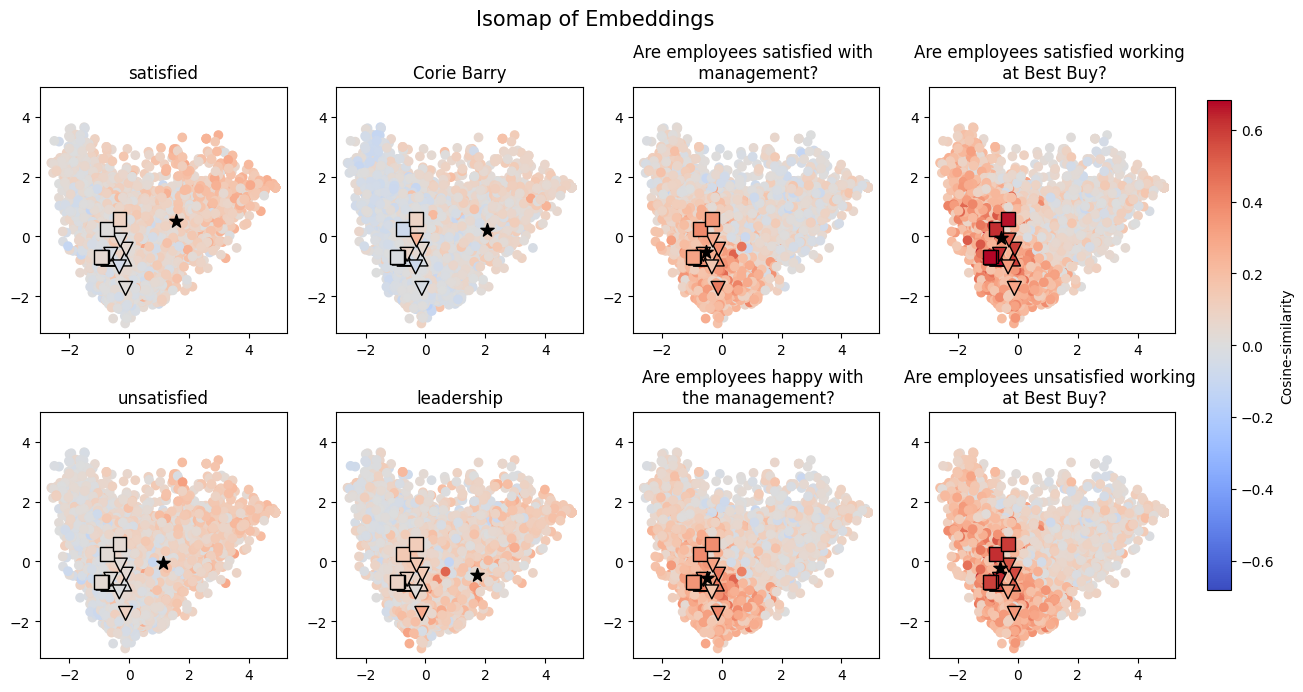

In [118]:
from matplotlib import pyplot as plt
import seaborn as sns

reduction_name = 'Isomap'
selected_keywords = [
    'satisfied',
    'Corie Barry',
    "Are employees satisfied with management?",
    "Are employees satisfied working at Best Buy?",
    'unsatisfied',
    "leadership",
    "Are employees happy with the management?",
    "Are employees unsatisfied working at Best Buy?",
]
selected_keyword_indices = [keywords.index(keyword) for keyword in selected_keywords]

selected_keyword_similarities = np.array(keyword_similarities)[selected_keyword_indices]
selected_keyword_embeddings = np.array(keyword_embeddings)[selected_keyword_indices]
reduced_keyword_vectors = np.array(reduced_keywords[reduction_name])[selected_keyword_indices]

# Plot the reduced embeddings as different figures in the same plot
reducer = reductions[reduction_name]
reduced_vectors = reduced_embeddings[reduction_name]

max_abs_dist = np.max(np.abs(selected_keyword_similarities)) * 0.9
min_dist = -max_abs_dist - 0.01
max_dist = max_abs_dist + 0.01

selected_positive_ids = [31, 32, 1151, 1731]
selected_negative_ids = [943, 257, 651, 222]

selected_negative_ids = [1416, 4921, 827,  651, 222]
selected_positive_ids = [3777, 1732, 32, 1151, 1731]
selected_irrelevant_ids = [4855, 3062, 1727, 4867]
# Create a figure with subplots
fig = plt.figure(figsize=(12, 7))
for ind, (keyword, reduced_keyword_vector, keyword_similarities_slice) in enumerate(zip(selected_keywords, reduced_keyword_vectors, selected_keyword_similarities)):
    dist = keyword_similarities_slice
    
    reduced_vectors = reduced_embeddings[reduction_name]

    ax = fig.add_subplot(2,4, ind + 1)
    inds_excluding_selected = list(set(range(len(reduced_vectors))) - set(selected_positive_ids) -  set(selected_negative_ids) - set(selected_irrelevant_ids))
    im = ax.scatter(reduced_vectors[inds_excluding_selected, 0], reduced_vectors[inds_excluding_selected, 1], c=keyword_similarities_slice[inds_excluding_selected], cmap='coolwarm', vmin=min_dist, vmax=max_dist)
    im = ax.scatter(reduced_vectors[selected_positive_ids, 0], reduced_vectors[selected_positive_ids, 1], c=keyword_similarities_slice[selected_positive_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = '^', s = 100)
    im = ax.scatter(reduced_vectors[selected_negative_ids, 0], reduced_vectors[selected_negative_ids, 1], c=keyword_similarities_slice[selected_negative_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 'v', s = 100)
    im = ax.scatter(reduced_vectors[selected_irrelevant_ids, 0], reduced_vectors[selected_irrelevant_ids, 1], c=keyword_similarities_slice[selected_irrelevant_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 's', s = 100)

    ax.scatter(reduced_keyword_vector[0], reduced_keyword_vector[1], marker='*', color='k', s=100)
    ax.set_title(f'{wrap_text(keyword, n_words = 4)}')
    ax.axis('square')
fig.suptitle(f'{reduction_name} of Embeddings', fontsize=15)
# Add colorbar to the figure with title "Cosine-similarity" on the right
cax = fig.add_axes([1.01, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
fig.colorbar(im, cax=cax, label='Cosine-similarity')
# Show the plots
plt.tight_layout()
plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_20036\1192466219.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


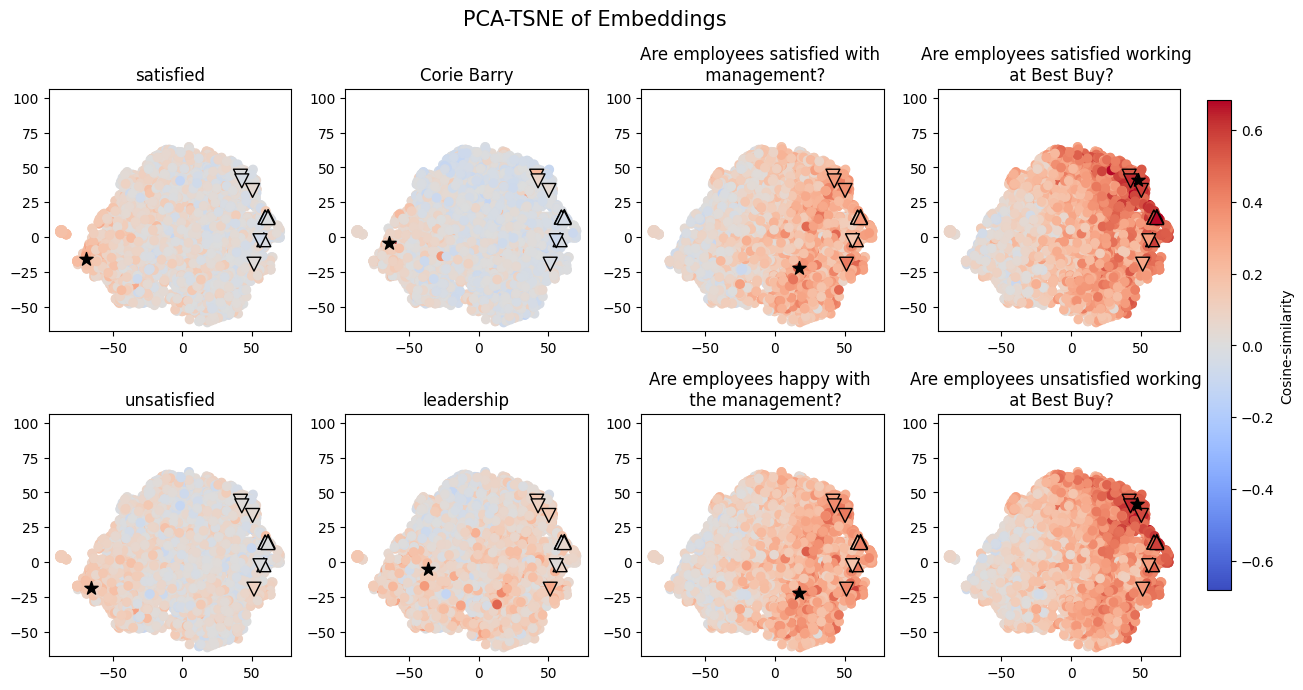

In [116]:
from matplotlib import pyplot as plt
import seaborn as sns

reduction_name = 'PCA-TSNE'
selected_keywords = [
    'satisfied',
    'Corie Barry',
    "Are employees satisfied with management?",
    "Are employees satisfied working at Best Buy?",
    'unsatisfied',
    "leadership",
    "Are employees happy with the management?",
    "Are employees unsatisfied working at Best Buy?",
]
selected_keyword_indices = [keywords.index(keyword) for keyword in selected_keywords]

selected_keyword_similarities = np.array(keyword_similarities)[selected_keyword_indices]
selected_keyword_embeddings = np.array(keyword_embeddings)[selected_keyword_indices]
reduced_keyword_vectors = np.array(reduced_keywords[reduction_name])[selected_keyword_indices]

# Plot the reduced embeddings as different figures in the same plot
reducer = reductions[reduction_name]
reduced_vectors = reduced_embeddings[reduction_name]

max_abs_dist = np.max(np.abs(selected_keyword_similarities)) * 0.9
min_dist = -max_abs_dist - 0.01
max_dist = max_abs_dist + 0.01

selected_positive_ids = [31, 32, 1151, 1731]
selected_negative_ids = [943, 257, 651, 222]

selected_negative_ids = [1416, 4921, 827,  651, 222]
selected_positive_ids = [3777, 1732, 32, 1151, 1731]
# Create a figure with subplots
fig = plt.figure(figsize=(12, 7))
for ind, (keyword, reduced_keyword_vector, keyword_similarities_slice) in enumerate(zip(selected_keywords, reduced_keyword_vectors, selected_keyword_similarities)):
    dist = keyword_similarities_slice
    
    reduced_vectors = reduced_embeddings[reduction_name]

    ax = fig.add_subplot(2,4, ind + 1)
    inds_excluding_selected = list(set(range(len(reduced_vectors))) - set(selected_positive_ids) -  set(selected_negative_ids))
    im = ax.scatter(reduced_vectors[inds_excluding_selected, 0], reduced_vectors[inds_excluding_selected, 1], c=keyword_similarities_slice[inds_excluding_selected], cmap='coolwarm', vmin=min_dist, vmax=max_dist)
    im = ax.scatter(reduced_vectors[selected_positive_ids, 0], reduced_vectors[selected_positive_ids, 1], c=keyword_similarities_slice[selected_positive_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = '^', s = 100)
    im = ax.scatter(reduced_vectors[selected_negative_ids, 0], reduced_vectors[selected_negative_ids, 1], c=keyword_similarities_slice[selected_negative_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 'v', s = 100)

    ax.scatter(reduced_keyword_vector[0], reduced_keyword_vector[1], marker='*', color='k', s=100)
    ax.set_title(f'{wrap_text(keyword, n_words = 4)}')
    ax.axis('square')
fig.suptitle(f'{reduction_name} of Embeddings', fontsize=15)
# Add colorbar to the figure with title "Cosine-similarity" on the right
cax = fig.add_axes([1.01, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
fig.colorbar(im, cax=cax, label='Cosine-similarity')
# Show the plots
plt.tight_layout()
plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_20036\442393464.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


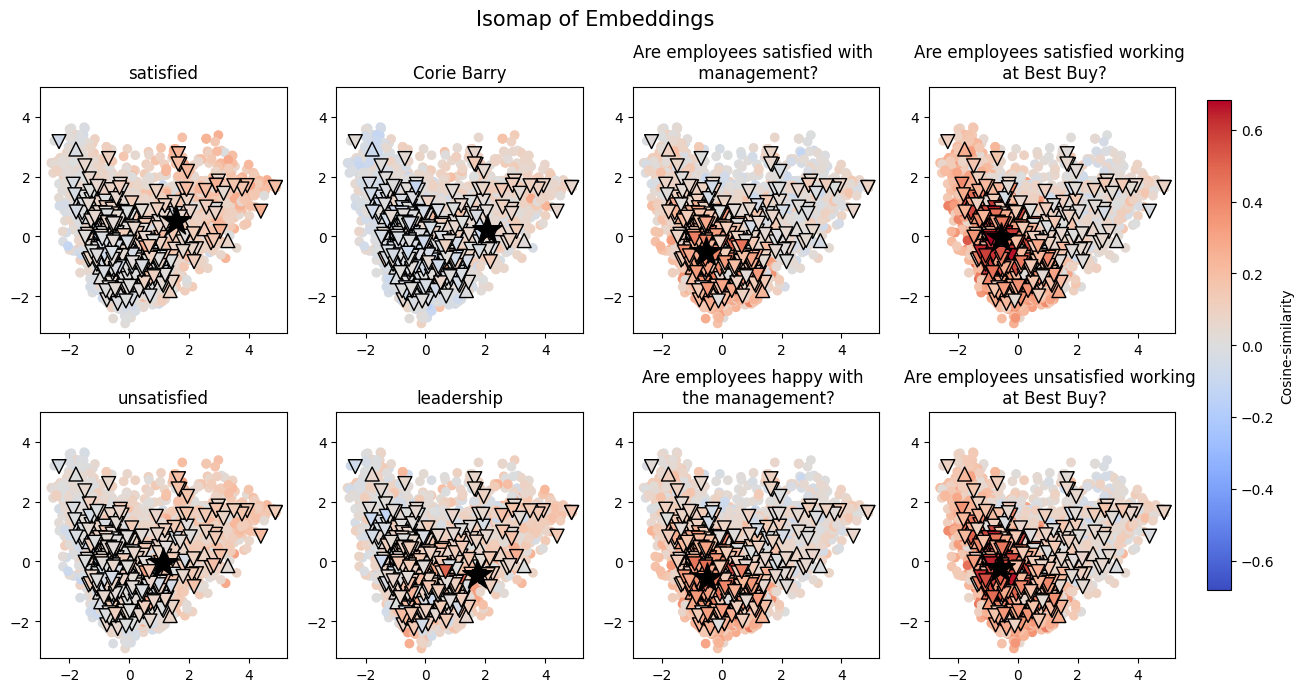

In [92]:
from matplotlib import pyplot as plt
import seaborn as sns

reduction_name = 'Isomap'
selected_keywords = [
    'satisfied',
    'Corie Barry',
    "Are employees satisfied with management?",
    "Are employees satisfied working at Best Buy?",
    'unsatisfied',
    "leadership",
    "Are employees happy with the management?",
    "Are employees unsatisfied working at Best Buy?",
]
selected_keyword_indices = [keywords.index(keyword) for keyword in selected_keywords]

selected_keyword_similarities = np.array(keyword_similarities)[selected_keyword_indices]
selected_keyword_embeddings = np.array(keyword_embeddings)[selected_keyword_indices]
reduced_keyword_vectors = np.array(reduced_keywords[reduction_name])[selected_keyword_indices]

# Plot the reduced embeddings as different figures in the same plot
reducer = reductions[reduction_name]
reduced_vectors = reduced_embeddings[reduction_name]

max_abs_dist = np.max(np.abs(selected_keyword_similarities)) * 0.9
min_dist = -max_abs_dist - 0.01
max_dist = max_abs_dist + 0.01

selected_positive_ids = [31, 32, 1151, 1731]
selected_negative_ids = [943, 257, 651, 222]
positive_ids = df_all[df_all.label==1].index
negative_ids = df_all[df_all.label==-1].index
selected_positive_ids = positive_ids
selected_negative_ids = negative_ids
# Create a figure with subplots
fig = plt.figure(figsize=(12, 7))
for ind, (keyword, reduced_keyword_vector, keyword_similarities_slice) in enumerate(zip(selected_keywords, reduced_keyword_vectors, selected_keyword_similarities)):
    dist = keyword_similarities_slice
    
    reduced_vectors = reduced_embeddings[reduction_name]

    ax = fig.add_subplot(2,4, ind + 1)
    inds_excluding_selected = list(set(range(len(reduced_vectors))) - set(selected_positive_ids) -  set(selected_negative_ids))
    im = ax.scatter(reduced_vectors[inds_excluding_selected, 0], reduced_vectors[inds_excluding_selected, 1], c=keyword_similarities_slice[inds_excluding_selected], cmap='coolwarm', vmin=min_dist, vmax=max_dist)
    im = ax.scatter(reduced_vectors[selected_positive_ids, 0], reduced_vectors[selected_positive_ids, 1], c=keyword_similarities_slice[selected_positive_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = '^', s = 100)
    im = ax.scatter(reduced_vectors[selected_negative_ids, 0], reduced_vectors[selected_negative_ids, 1], c=keyword_similarities_slice[selected_negative_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 'v', s = 100)

    ax.scatter(reduced_keyword_vector[0], reduced_keyword_vector[1], marker='*', color='k', s=500)
    ax.set_title(f'{wrap_text(keyword, n_words = 4)}')
    ax.axis('square')
fig.suptitle(f'{reduction_name} of Embeddings', fontsize=15)
# Add colorbar to the figure with title "Cosine-similarity" on the right
cax = fig.add_axes([1.01, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
fig.colorbar(im, cax=cax, label='Cosine-similarity')
# Show the plots
plt.tight_layout()
plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_20036\3725261632.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


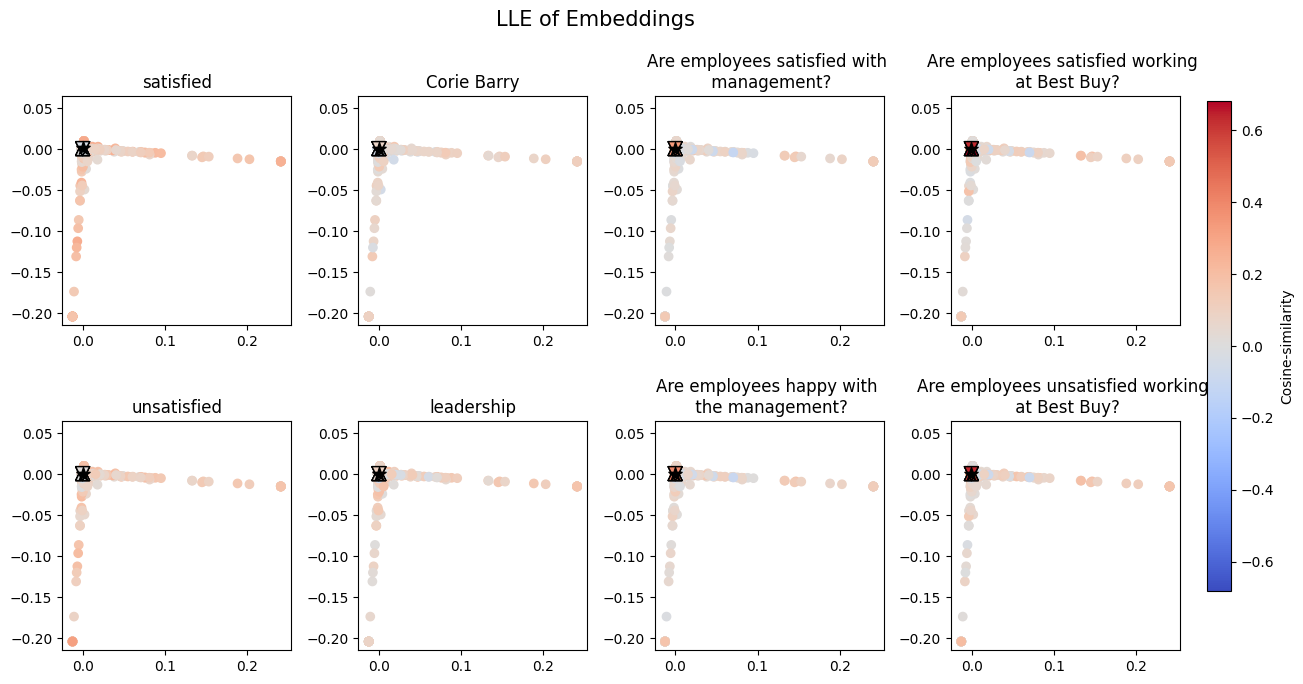

In [90]:
from matplotlib import pyplot as plt
import seaborn as sns

reduction_name = 'LLE'
selected_keywords = [
    'satisfied',
    'Corie Barry',
    "Are employees satisfied with management?",
    "Are employees satisfied working at Best Buy?",
    'unsatisfied',
    "leadership",
    "Are employees happy with the management?",
    "Are employees unsatisfied working at Best Buy?",
]
selected_keyword_indices = [keywords.index(keyword) for keyword in selected_keywords]

selected_keyword_similarities = np.array(keyword_similarities)[selected_keyword_indices]
selected_keyword_embeddings = np.array(keyword_embeddings)[selected_keyword_indices]
reduced_keyword_vectors = np.array(reduced_keywords[reduction_name])[selected_keyword_indices]

# Plot the reduced embeddings as different figures in the same plot
reducer = reductions[reduction_name]
reduced_vectors = reduced_embeddings[reduction_name]

max_abs_dist = np.max(np.abs(selected_keyword_similarities)) * 0.9
min_dist = -max_abs_dist - 0.01
max_dist = max_abs_dist + 0.01

selected_positive_ids = [31, 32, 1151, 1731]
selected_negative_ids = [943, 257, 651, 222]
# Create a figure with subplots
fig = plt.figure(figsize=(12, 7))
for ind, (keyword, reduced_keyword_vector, keyword_similarities_slice) in enumerate(zip(selected_keywords, reduced_keyword_vectors, selected_keyword_similarities)):
    dist = keyword_similarities_slice
    
    reduced_vectors = reduced_embeddings[reduction_name]

    ax = fig.add_subplot(2,4, ind + 1)
    inds_excluding_selected = list(set(range(len(reduced_vectors))) - set(selected_positive_ids) -  set(selected_negative_ids))
    im = ax.scatter(reduced_vectors[inds_excluding_selected, 0], reduced_vectors[inds_excluding_selected, 1], c=keyword_similarities_slice[inds_excluding_selected], cmap='coolwarm', vmin=min_dist, vmax=max_dist)
    im = ax.scatter(reduced_vectors[selected_positive_ids, 0], reduced_vectors[selected_positive_ids, 1], c=keyword_similarities_slice[selected_positive_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = '^', s = 100)
    im = ax.scatter(reduced_vectors[selected_negative_ids, 0], reduced_vectors[selected_negative_ids, 1], c=keyword_similarities_slice[selected_negative_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 'v', s = 100)

    ax.scatter(reduced_keyword_vector[0], reduced_keyword_vector[1], marker='*', color='k', s=100)
    ax.set_title(f'{wrap_text(keyword, n_words = 4)}')
    ax.axis('square')
fig.suptitle(f'{reduction_name} of Embeddings', fontsize=15)
# Add colorbar to the figure with title "Cosine-similarity" on the right
cax = fig.add_axes([1.01, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
fig.colorbar(im, cax=cax, label='Cosine-similarity')
# Show the plots
plt.tight_layout()
plt.show()

C:\Users\peter\AppData\Local\Temp\ipykernel_20036\3031328827.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


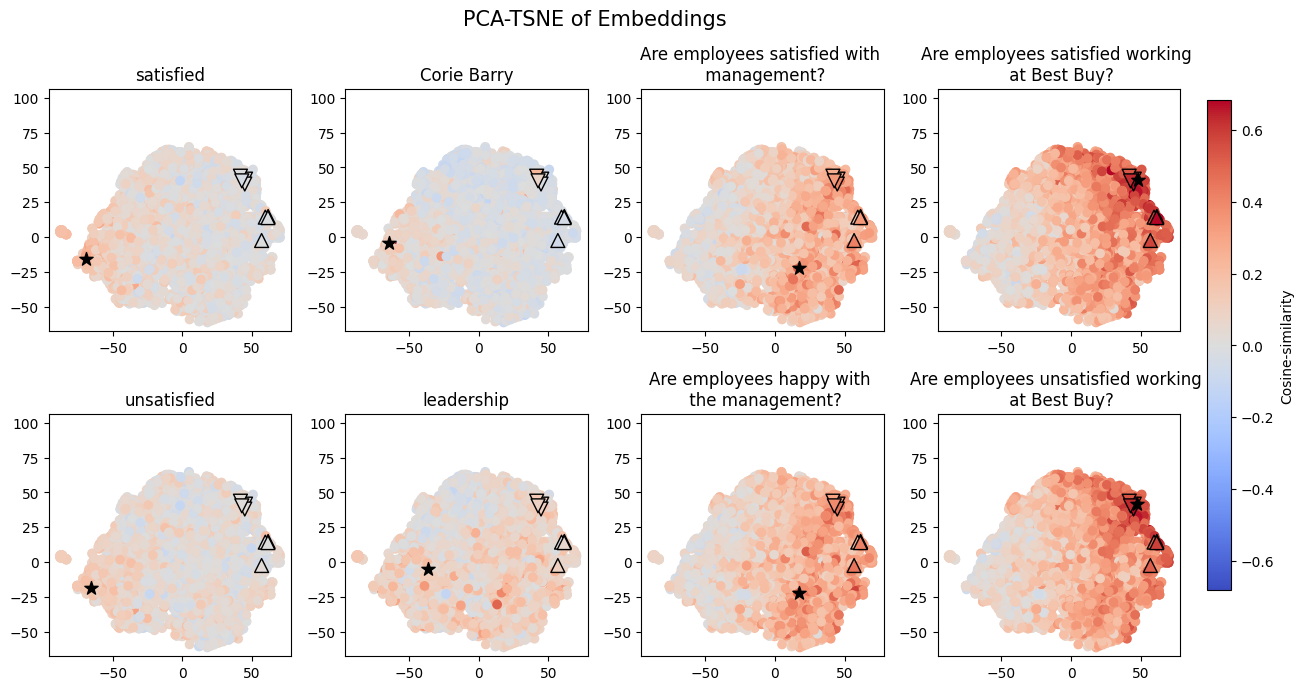

In [89]:
from matplotlib import pyplot as plt
import seaborn as sns

reduction_name = 'PCA-TSNE'
selected_keywords = [
    'satisfied',
    'Corie Barry',
    "Are employees satisfied with management?",
    "Are employees satisfied working at Best Buy?",
    'unsatisfied',
    "leadership",
    "Are employees happy with the management?",
    "Are employees unsatisfied working at Best Buy?",
]
selected_keyword_indices = [keywords.index(keyword) for keyword in selected_keywords]

selected_keyword_similarities = np.array(keyword_similarities)[selected_keyword_indices]
selected_keyword_embeddings = np.array(keyword_embeddings)[selected_keyword_indices]
reduced_keyword_vectors = np.array(reduced_keywords[reduction_name])[selected_keyword_indices]

# Plot the reduced embeddings as different figures in the same plot
reducer = reductions[reduction_name]
reduced_vectors = reduced_embeddings[reduction_name]

max_abs_dist = np.max(np.abs(selected_keyword_similarities)) * 0.9
min_dist = -max_abs_dist - 0.01
max_dist = max_abs_dist + 0.01

selected_positive_ids = [31, 32, 1151, 1731]
selected_negative_ids = [943, 257, 651, 222]
# Create a figure with subplots
fig = plt.figure(figsize=(12, 7))
for ind, (keyword, reduced_keyword_vector, keyword_similarities_slice) in enumerate(zip(selected_keywords, reduced_keyword_vectors, selected_keyword_similarities)):
    dist = keyword_similarities_slice
    
    reduced_vectors = reduced_embeddings[reduction_name]

    ax = fig.add_subplot(2,4, ind + 1)
    inds_excluding_selected = list(set(range(len(reduced_vectors))) - set(selected_positive_ids) -  set(selected_negative_ids))
    im = ax.scatter(reduced_vectors[inds_excluding_selected, 0], reduced_vectors[inds_excluding_selected, 1], c=keyword_similarities_slice[inds_excluding_selected], cmap='coolwarm', vmin=min_dist, vmax=max_dist)
    im = ax.scatter(reduced_vectors[selected_positive_ids, 0], reduced_vectors[selected_positive_ids, 1], c=keyword_similarities_slice[selected_positive_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = '^', s = 100)
    im = ax.scatter(reduced_vectors[selected_negative_ids, 0], reduced_vectors[selected_negative_ids, 1], c=keyword_similarities_slice[selected_negative_ids], cmap='coolwarm', edgecolors='k', vmin=min_dist, vmax=max_dist, marker = 'v', s = 100)

    ax.scatter(reduced_keyword_vector[0], reduced_keyword_vector[1], marker='*', color='k', s=100)
    ax.set_title(f'{wrap_text(keyword, n_words = 4)}')
    ax.axis('square')
fig.suptitle(f'{reduction_name} of Embeddings', fontsize=15)
# Add colorbar to the figure with title "Cosine-similarity" on the right
cax = fig.add_axes([1.01, 0.15, 0.02, 0.7])  # Adjust the position of the colorbar
fig.colorbar(im, cax=cax, label='Cosine-similarity')
# Show the plots
plt.tight_layout()
plt.show()


### Clustering

In [138]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN, HDBSCAN

In [139]:
from sklearn.metrics import log_loss, homogeneity_score, v_measure_score, completeness_score
from typing import Dict

def calc_prob(label_list: pd.Series, unique_labels = [-1,1,0]) -> pd.Series:
    output = (label_list.value_counts()/label_list.value_counts().sum()).reset_index()
    output = pd.merge(output, pd.DataFrame({'label':unique_labels}), how='outer').fillna(0).sort_values('label').set_index('label')
    return output.values.T[0].tolist()

def calc_mode(label_list: pd.Series) -> pd.Series:
    return pd.Series([np.mean(val) for val in label_list.mode().values])

def calc_metrics(df_labeled) -> Dict[str, float]:
    cluster_probs = df_labeled[['cluster','label']].groupby('cluster').agg(calc_prob).reset_index().rename(columns={'label':'cluster_probs'})
    if 'cluster_probs' in df_labeled.columns:
        df_labeled = df_labeled.drop(columns=['cluster_probs'])
    df_labeled = df_labeled.merge(cluster_probs, on='cluster')
    cluster_probs = np.array([np.array(row) for row in df_labeled.cluster_probs.values])
    
    return {
        'homogeneity': homogeneity_score(df_labeled['label'], df_labeled['cluster']),
        'completeness': completeness_score(df_labeled['label'], df_labeled['cluster']),
        'v_measure': v_measure_score(df_labeled['label'], df_labeled['cluster']),
        'cross-entropy': log_loss(df_labeled.label.values, cluster_probs, labels=[-1,0,1]),
    }

In [22]:
reduction_name = 'Isomap'
reduced_vectors = reduced_embeddings[reduction_name]
clusterer_dict = {
    'AC_0.1' : AgglomerativeClustering(distance_threshold=0.1, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'AC_0.15' : AgglomerativeClustering(distance_threshold=0.15, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'AC_0.2' : AgglomerativeClustering(distance_threshold=0.2, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'AC_0.25' : AgglomerativeClustering(distance_threshold=0.25, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'AC_0.3' : AgglomerativeClustering(distance_threshold=0.3, compute_full_tree = True, n_clusters = None, linkage='complete'),
    'Kmeans_150': KMeans(init='k-means++', n_clusters = 150, n_init=50),
    'Kmeans_300': KMeans(init='k-means++', n_clusters = 300, n_init=100),
}
metric_summary = []
for name, clusterer in clusterer_dict.items():
    clusters = clusterer.fit(reduced_vectors)
    df_all['cluster'] = clusters.labels_
    df_labeled = df_all[~df_all.label.isna()]
    metrics_out = calc_metrics(df_labeled)
    context_dict = {
        'method':name, 
        'reduction method': reduction_name,
        '# of dimensions' : reduced_vectors.shape[1],
        '# of clusters': len(np.unique(clusters.labels_))
    }
    metric_summary.append(context_dict | metrics_out)
    display(pd.DataFrame([context_dict|metrics_out]))
pd.DataFrame(metric_summary)

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.1           Isomap                2           1502     0.774113   

   completeness  v_measure  cross-entropy  
0      0.101388   0.179294       0.179272

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.15           Isomap                2            999     0.673834   

   completeness  v_measure  cross-entropy  
0      0.092314   0.162383       0.258856

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.2           Isomap                2            738     0.587548   

   completeness  v_measure  cross-entropy  
0      0.083499   0.146218       0.327336

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.25           Isomap                2            567     0.517585   

   completeness  v_measure  cross-entropy  
0      0.076601   0.133452       0.382861

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  AC_0.3           Isomap                2            440     0.463518   

   completeness  v_measure  cross-entropy  
0      0.071228    0.12348        0.42577

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  Kmeans_150           Isomap                2            150     0.304343   

   completeness  v_measure  cross-entropy  
0      0.053482   0.090977       0.552097

method reduction method  # of dimensions  # of clusters  homogeneity  \
0  Kmeans_300           Isomap                2            300      0.43611   

   completeness  v_measure  cross-entropy  
0      0.068764   0.118796       0.447522

method reduction method  # of dimensions  # of clusters  homogeneity  \
0      AC_0.1           Isomap                2           1502     0.774113   
1     AC_0.15           Isomap                2            999     0.673834   
2      AC_0.2           Isomap                2            738     0.587548   
3     AC_0.25           Isomap                2            567     0.517585   
4      AC_0.3           Isomap                2            440     0.463518   
5  Kmeans_150           Isomap                2            150     0.304343   
6  Kmeans_300           Isomap                2            300     0.436110   

   completeness  v_measure  cross-entropy  
0      0.101388   0.179294       0.179272  
1      0.092314   0.162383       0.258856  
2      0.083499   0.146218       0.327336  
3      0.076601   0.133452       0.382861  
4      0.071228   0.123480       0.425770  
5      0.053482   0.090977       0.552097  
6      0.068764   0.118796       0.447522

In [146]:
reduced_embeddings['none'] = embeddings

## Make a plot of clustered data in 3d

In [404]:
reduced_embeddings['Isomap3d'] = Isomap(n_components=3).fit_transform(embeddings)

{'method': 'LLE', 'reduction method': 'Isomap3d', '# of dimensions': 3, '# of clusters': 500, 'homogeneity': 0.5598335877223325, 'completeness': 0.08231868257709146, 'v_measure': 0.14353219800101458, 'cross-entropy': 0.34933088142002444}


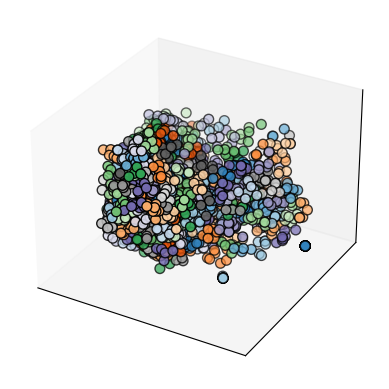

In [419]:
from matplotlib import pyplot as plt

reduction_name = 'Isomap3d'
reduced_vectors = reduced_embeddings[reduction_name]
clusterer = KMeans(init='k-means++', n_clusters = 500, n_init=10)
clusters = clusterer.fit(reduced_vectors)
cluster_id = clusters.labels_

df_all['cluster'] = clusters.labels_
df_labeled = df_all[~df_all.label.isna()]
metrics_out = calc_metrics(df_labeled)
context_dict = {
    'method':name, 
    'reduction method': reduction_name,
    '# of dimensions' : reduced_vectors.shape[1],
    '# of clusters': len(np.unique(clusters.labels_))
}
print(context_dict | metrics_out)

plt.figure()

ax = plt.axes(projection="3d")

im = ax.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], reduced_vectors[:, 2], c=cluster_id[:], cmap='tab20c', edgecolor='k', label=index_name, marker='o', s=50)

#plt.title(f'{reduction_name}')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.show()
    

In [420]:
reduced_vectors.shape

(5667, 3)

In [406]:
retrieval_clusters = clusters

## Perform kmeans clustering with n=500

{'method': 'LLE', 'reduction method': 'none', '# of dimensions': 768, '# of clusters': 500, 'homogeneity': 0.6613357317257492, 'completeness': 0.10046948280043383, 'v_measure': 0.17443844609348974, 'cross-entropy': 0.2687753632303082}


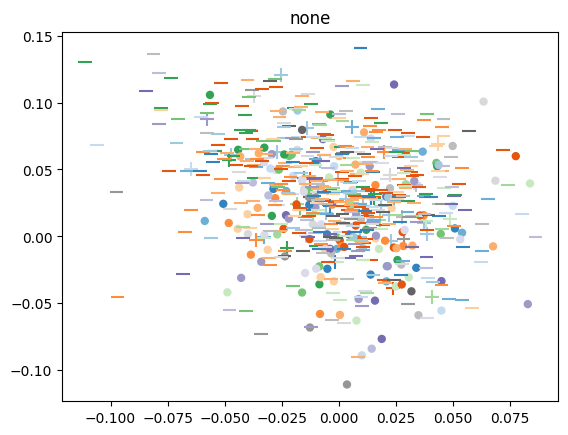

In [154]:
from matplotlib import pyplot as plt

reduction_name = 'none'
reduced_vectors = reduced_embeddings[reduction_name]
clusterer = AgglomerativeClustering(distance_threshold=1.25, compute_full_tree = True, n_clusters = None, linkage='complete')
clusterer = KMeans(init='k-means++', n_clusters = 500, n_init=50)
clusters = clusterer.fit(reduced_vectors)
cluster_id = clusters.labels_

df_all['cluster'] = clusters.labels_
df_labeled = df_all[~df_all.label.isna()]
metrics_out = calc_metrics(df_labeled)
context_dict = {
    'method':name, 
    'reduction method': reduction_name,
    '# of dimensions' : reduced_vectors.shape[1],
    '# of clusters': len(np.unique(clusters.labels_))
}
print(context_dict | metrics_out)
index_dict = { 
    'positive' : df_all[df_all.label==1].chunk_id,
    'neutral' : df_all[df_all.label==0].chunk_id,
    'negative' : df_all[df_all.label==-1].chunk_id
}
markers = ['+', '.', '_']

plt.figure()

for i, (index_name, indexes) in enumerate(index_dict.items()):
    im = plt.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1], c=cluster_id[indexes], cmap='tab20c', label=index_name, marker=markers[i], s=100)
plt.title(f'{reduction_name}')
plt.show()
    

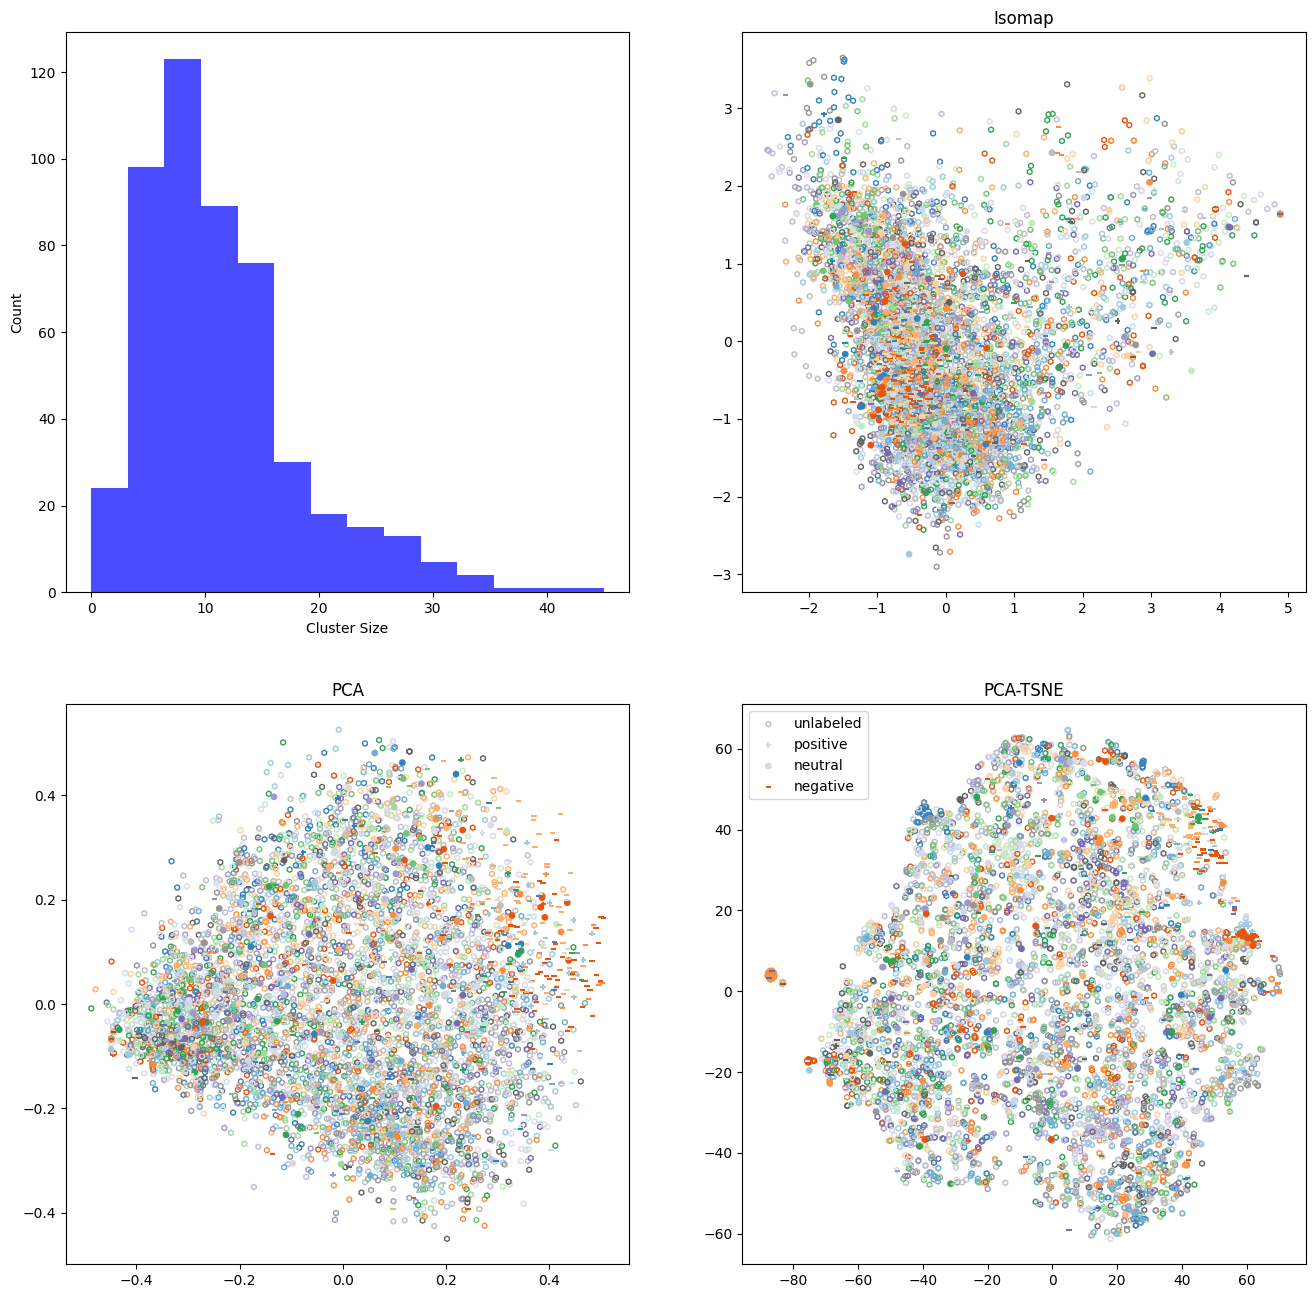

In [157]:
reduction_names = ['Isomap', 'PCA', 'PCA-TSNE']
cluster_id = df_all.sort_values('chunk_id').cluster
marker_size = 15

fig = plt.figure(figsize=(16,16))

cluster_sizes = cluster_id.reset_index().groupby('cluster').count()
ax = fig.add_subplot(2, 2, 1)
# Make a histogram of cluster sizes
plt.hist(cluster_sizes.values, bins=list(np.linspace(0, cluster_sizes.max().values+1, 15).T[0]), color='b', alpha=0.7)
# Add a vertical line at 0
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Count')

for subplot_id, reduction_name in enumerate(reduction_names):
    reduced_vectors = reduced_embeddings[reduction_name]

    index_dict = { 
        'unlabeled' : df_all[df_all.label.isna()].chunk_id.values,
        'positive' : df_all[df_all.label==1].chunk_id.values,
        'neutral' : df_all[df_all.label==0].chunk_id.values,
        'negative' : df_all[df_all.label==-1].chunk_id.values
    }
    markers = ["h",'+', 'o', '_']

    ax = fig.add_subplot(2, 2, subplot_id+2)

    for i, (index_name, indexes) in enumerate(index_dict.items()):
        if i==0:
            im = ax.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1],  edgecolors = plt.cm.tab20c(cluster_id[indexes]%20), facecolors='none', label=index_name, marker=markers[i], s=marker_size)
            continue
        im = ax.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1], c=cluster_id[indexes], cmap='tab20c', label=index_name, marker=markers[i], s=marker_size)
    ax.set_title(f'{reduction_name}')
plt.legend()
plt.show()

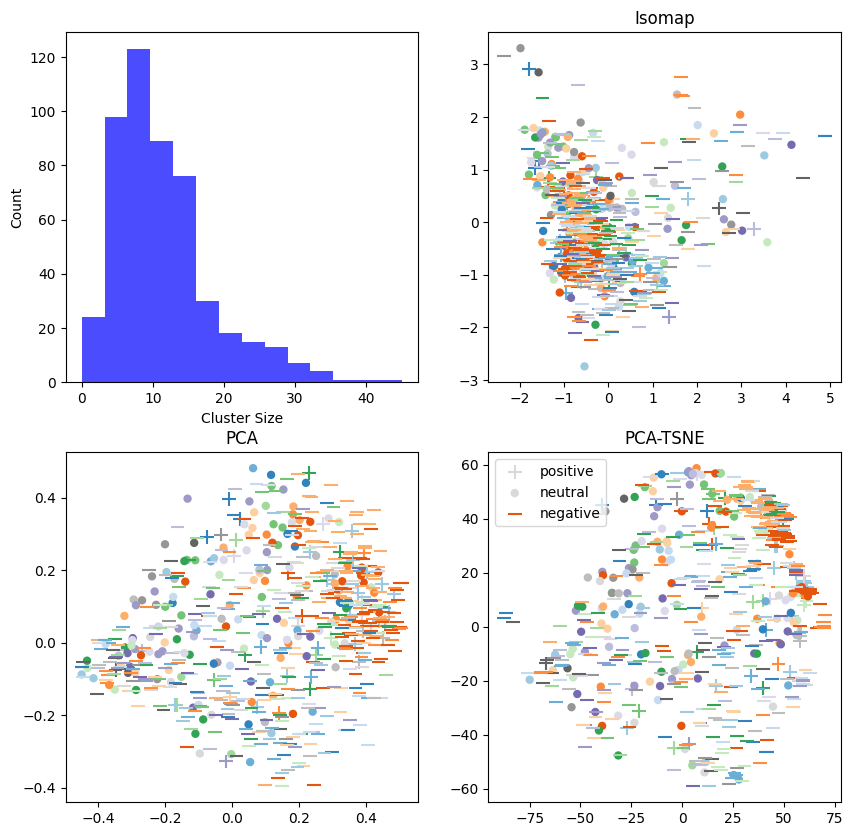

In [158]:
reduction_names = ['Isomap', 'PCA', 'PCA-TSNE']
cluster_id = df_all.sort_values('chunk_id').cluster

fig = plt.figure(figsize=(10,10))

cluster_sizes = cluster_id.reset_index().groupby('cluster').count()
ax = fig.add_subplot(2, 2, 1)
# Make a histogram of cluster sizes
plt.hist(cluster_sizes.values, bins=list(np.linspace(0, cluster_sizes.max().values+1, 15).T[0]), color='b', alpha=0.7)
# Add a vertical line at 0
ax.set_xlabel('Cluster Size')
ax.set_ylabel('Count')

for subplot_id, reduction_name in enumerate(reduction_names):
    reduced_vectors = reduced_embeddings[reduction_name]

    index_dict = { 
        'positive' : df_all[df_all.label==1].chunk_id.values,
        'neutral' : df_all[df_all.label==0].chunk_id.values,
        'negative' : df_all[df_all.label==-1].chunk_id.values
    }
    markers = ['+', '.', '_']

    ax = fig.add_subplot(2, 2, subplot_id+2)

    for i, (index_name, indexes) in enumerate(index_dict.items()):
        im = ax.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1], c=cluster_id[indexes], cmap='tab20c', label=index_name, marker=markers[i], s=100)
    ax.set_title(f'{reduction_name}')
plt.legend()
plt.show()

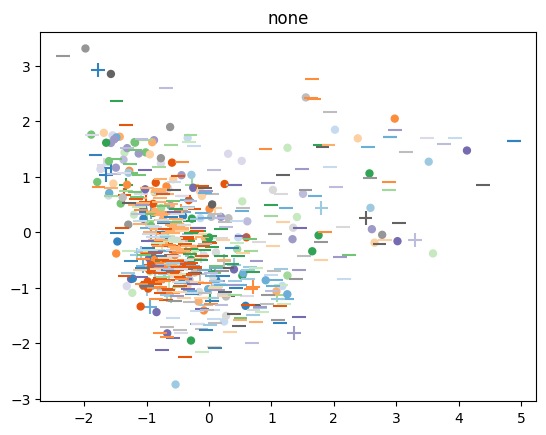

In [155]:
plt.figure()

reduced_vectors = reduced_embeddings['Isomap']
for i, (index_name, indexes) in enumerate(index_dict.items()):
    im = plt.scatter(reduced_vectors[indexes, 0], reduced_vectors[indexes, 1], c=cluster_id[indexes], cmap='tab20c', label=index_name, marker=markers[i], s=100)
plt.title(f'{reduction_name}')
plt.show()
    

#### Convert to dict and save

In [402]:
clusters_dict = clusters.__dict__
for key, value in clusters_dict.items():
    if type(value) in [np.ndarray, np.array]:
        clusters_dict[key] = value.tolist()
print(clusters_dict.keys())

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'n_init', 'verbose', 'random_state', 'copy_x', 'algorithm', 'n_features_in_', '_tol', '_n_init', '_algorithm', '_n_threads', 'cluster_centers_', '_n_features_out', 'labels_', 'inertia_', 'n_iter_'])


In [403]:
import json
with open('kmeans_n500_all_embeddings.json','w') as f:
    json.dump(clusters_dict, f)

## Run retrieval using clusters

In [335]:
self.get_sorted_clusters(query_embedding)

tensor([ 20, 145, 415, 410, 172, 122, 555, 407, 665, 463,  55, 451, 116, 558,
          6, 198, 607, 554, 381, 472, 464, 212,  77, 441, 416, 106, 444, 692,
         21, 586, 135, 704, 609, 318,   4, 522, 595, 240, 523, 405, 572, 639,
        211, 560, 300, 482, 610, 573, 621, 313, 218, 110, 447, 224, 682, 223,
         79, 576, 130, 363, 152, 250, 458, 567, 129, 719,  76, 219, 236, 117,
        584,  31, 358, 330, 418, 693, 494,  35, 143, 120, 620, 356, 311, 306,
        204, 379, 679,  80, 160, 439, 462, 624, 678,  61, 690, 438, 430, 547,
        454, 411, 475,  84, 103, 383, 292, 398,  58, 396, 254, 562, 268, 452,
        163, 233, 496, 119, 666, 588, 436, 314,  71, 424, 702, 264, 297, 486,
        234, 421, 448,  25, 365, 612, 265,   3,  46, 677,  36, 459, 361, 232,
        518, 414, 603, 681, 248,  12, 215, 166, 546, 153, 307, 684, 391,  57,
         30, 161, 347, 575,  89, 134, 244, 406, 357, 180, 622, 660, 618, 271,
        258, 342, 242, 174, 308, 279, 661, 718, 478, 532, 299, 3

In [316]:
self = retr
cluster_scores = self.metric(query_embedding, self.centroids)[0]
print(f'Centroid scores: ', cluster_scores)
np.argsort(cluster_scores)
print(cluster_scores[np.argsort(-cluster_scores)])

Centroid scores:  tensor([ 0.0110,  0.0396,  0.0952,  0.1243,  0.1807,  0.0897,  0.2045, -0.0108,
         0.0149,  0.0384,  0.0820,  0.0199,  0.1189,  0.0650,  0.0188,  0.0166,
         0.0011,  0.0675,  0.0617, -0.0224,  0.2811,  0.1840,  0.0663,  0.0285,
         0.0448,  0.1264,  0.0609,  0.0110,  0.0047,  0.0421,  0.1163,  0.1537,
         0.0764,  0.0672,  0.0929,  0.1508,  0.1223, -0.0197,  0.1059,  0.0059,
         0.0881,  0.0769,  0.0246,  0.0370, -0.0042,  0.0095,  0.1235, -0.0093,
         0.0118,  0.0586, -0.0030,  0.0359,  0.0459,  0.0290,  0.0615,  0.2175,
         0.0743,  0.1167,  0.1355,  0.0954,  0.0227,  0.1421,  0.0343,  0.0373,
         0.0433,  0.0029,  0.1039,  0.0939,  0.0357,  0.0925,  0.0679,  0.1298,
         0.0487,  0.0697,  0.0997,  0.1008,  0.1558,  0.1893,  0.0442,  0.1617,
         0.1452,  0.1015,  0.1024,  0.0670,  0.1366,  0.0841, -0.0340,  0.0982,
         0.0200,  0.1141,  0.0166,  0.0762, -0.0138,  0.0488,  0.0664,  0.0762,
        -0.0336, -0.01

In [351]:
from src.retriever import BaseRetriever, ChromaRetriever, QdrantRetriever, CustomRetriever
from typing import Literal, List, Dict, Any
from langchain_core.documents import Document
from sklearn.metrics import recall_score, f1_score, precision_score
from langchain_community.document_loaders import DataFrameLoader
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

class RetrieverEvaluator:
    """
    Class which evaluates the quality of retrieval of a given retriever pipeline on a given dataset

    Construction Arguments:
        1. retriever_name: Defines the pipeline that will be utilized. One of the following:
            - 'chroma' : evaluates on ChromaRetriever class object
            - 'qdrant' : evaluates on QdrantRetriever class object
            - 'custom' : evaluates on CustomRetriever class object
        2. encoder_name: embedding model to be used. Makes use of models found at:
            - [SBERT](https://www.sbert.net/docs/pretrained_models.html)
            - [HuggingFace](https://huggingface.co/spaces/mteb/leaderboard)
        3. similarity_metric: similarity metric used to rank closest documents to the query in the 
        embedding space. One of the following:
            - 'cosine-similarity'
            - 'dot-product'
            - 'euclidian'
            - 'manhattan' (only available for qdrant retriever)
        4. sample_df: Dataframe that documents were sourced from. 
        Required to have the following columns to work:
            - 'question' : query for which we are assessing the quality of retrieval
            - 'statement' : statements that will be formatted as documents and filled into a database
            - 'average_label' : the fraction of human labelers who have labeled the 
            statement as relevant to the question
            - 'label_sum' : the total number of human labelers who have labeled the 
            statement as relevant to the question
        5. retrieved_doc_size: The number of documents to be retrieved from which evaluation scores will be calculated
        6. consensus_threshold: The minimum number of 'label_sum' for which a document is considered "True"

    Calling method: evaluate()
        1. Actions:
            - Defines the consensus label based on the consensus_threshold
            - Constructs the retriever class object
            - Loads documents
            - Calculates f1, precision, and recall scores of the retrieval
        2. Outputs: A dataframe containing the following columns:
            - 'question': question for which the retrieval quality was evaluated 
            - 'retriever': name of retriever pipeline 
            - 'encoder': name of embedding model
            - 'similarity': name of similarity metric used,
            - 'consensus_threshold': The minimum number of human labelers for which a document is considered ,
            - 'retrieval_size': Number of documents retrieved per question
            - 'total_true_labels': Total number of true labels in the set of documents for the given 
            question as defined by the consensus threshold
            - 'f1': calculated f1 score for the given question
            - 'recall': calculated recall score for the given question
            - 'precision': calculated precision score for the given question
    """
    
    def __init__(
            self, 
            retriever: BaseRetriever,
            similarity_metric: str,
            sample_df: pd.DataFrame, 
            retrieved_doc_size: int = 10,
            consensus_threshold: int = 2,
            clustering_model: KMeans = None
        ):
        self.retriever = retriever
        self.sample_df = sample_df
        self.similarity_name = similarity_metric
        self.n_retrieved = retrieved_doc_size
        self.questions = sample_df.question.unique()
        self.dataset_dict = self.parse_dataset()
        self.clustering_model = clustering_model

    def set_consensus(self):
        self.sample_df['consensus'] = (self.sample_df['label_sum'] >= self.consensus_threshold).astype(int)

    def _parse_dataset_one_question(self, question: str):
        df = self.sample_df.drop(columns = ['label_sum', 'average_label', 'consensus']).copy()
        df = df[df.question==question].fillna('')
        loader = DataFrameLoader(df, page_content_column='statement')
        return loader.load()
        
    def parse_dataset(self):
        return {
            q:self._parse_dataset_one_question(q) 
            for q in self.questions
        }

    def retrieve_one_question(self, question: str):
        retriever = self.get_retriever(self.dataset_dict[question])
        retriever.load_documents()
        retrieved_docs = retriever.retrieve(question, n = self.n_retrieved)
        return retrieved_docs
    
    def _parse_retriever_element(self, elem: Dict[str, Any]):
        return {'statement':elem['document'].page_content, 'score':elem['score']} | elem['document'].metadata

    def _construct_evaluation_df(self, question: str, output: List[Dict[str, Any]]) -> pd.DataFrame:
        df_pred = pd.DataFrame([self._parse_retriever_element(elem) for elem in output])
        df_pred['retrieved'] = 1
        return self.sample_df[self.sample_df.question==question].merge(
            df_pred, how='outer').fillna({'retrieved':0, 'consensus':0})

    def evaluate_one_question(self, question: str):
        retrieved_docs = self.retrieve_one_question(question)
        eval_df = self._construct_evaluation_df(question, retrieved_docs)

        f1 = f1_score(eval_df['consensus'], eval_df['retrieved'])
        recall = recall_score(eval_df['consensus'], eval_df['retrieved'])
        precision = precision_score(eval_df['consensus'], eval_df['retrieved'])
        
        return {
            'question':question, 
            'retriever':self.retriever.name, 
            'encoder':self.retriever.embedding_name,
            'similarity':self.retriever.similarity_name,
            'retrieval_size': len(retrieved_docs),
            'total_true_labels': eval_df['consensus'].sum(),
            'f1':f1, 
            'recall':recall, 
            'precision':precision
        }

    def evaluate(self):
        return pd.DataFrame([self.evaluate_one_question(q) for q in self.questions])

In [328]:
cluster_label = 636
cluster_docs = np.array(self.documents)[self.doc_cluster_labels == cluster_label]
cluster_docs

array([Document(page_content='I have 8 days coming up. And I’m 74. Suck it up.', metadata={'reddit_id': 'kr0j273', 'reddit_subreddit': 'BestBuyWorkers', 'reddit_permalink': '/r/BestBuyWorkers/comments/1atycal/scheduling_complaint/kr0j273/', 'aware_created_ts': '2024-02-18T12:28:57', 'reddit_parent_id': 't3_1atycal', 'aware_post_type': 'comment', 'reddit_link_id': 't3_1atycal'}),
       Document(page_content='This is a department of labor issue Turn them in', metadata={'reddit_id': 'kfe6goo', 'reddit_subreddit': 'BestBuyWorkers', 'reddit_permalink': '/r/BestBuyWorkers/comments/18rkcrr/just_passed_out_on_the_floor/kfe6goo/', 'aware_created_ts': '2023-12-29T01:34:09', 'reddit_parent_id': 't3_18rkcrr', 'aware_post_type': 'comment', 'reddit_link_id': 't3_18rkcrr'})],
      dtype=object)

In [199]:
labeled_set_df = pd.read_csv('../../data/best_buy/questions_statements_labels_all_questions.csv')
print(labeled_set_df.columns)
test_docs_df = labeled_set_df[['statement','reddit_id',
       'aware_post_type', 'aware_created_ts', 'reddit_link_id',
       'reddit_parent_id', 'reddit_permalink', 'reddit_subreddit']].drop_duplicates()
test_docs_df = test_docs_df[['reddit_id', 'statement']].merge(workers_df[list(set(keep_cols)-{'statement'})], on=['reddit_id'], how = 'left')
loader = DataFrameLoader(test_docs_df, 'statement')
test_docs = loader.load()
test_docs

Index(['Unnamed: 0', 'statement', 'question',
       'What are the most common reasons for employees to leave Best Buy?',
       'Do employees feel understaffed?',
       'What do Best Buy employees think of the company?', 'reddit_id',
       'aware_post_type', 'aware_created_ts', 'reddit_link_id',
       'reddit_parent_id', 'reddit_permalink', 'reddit_subreddit'],
      dtype='object')


[Document(page_content='![gif](giphy|znRstrOYuirrW)', metadata={'reddit_id': 'ju59a0l', 'reddit_subreddit': 'BestBuyWorkers', 'reddit_permalink': '/r/BestBuyWorkers/comments/15e1vvl/customer_posts_are_disallowed_on_this_subreddit/ju59a0l/', 'aware_created_ts': '2023-07-30T21:11:35', 'reddit_parent_id': 't3_15e1vvl', 'aware_post_type': 'comment', 'reddit_link_id': 't3_15e1vvl'}),
 Document(page_content='#shockedpikachuface', metadata={'reddit_id': 'hhgbgps', 'reddit_subreddit': 'BestBuyWorkers', 'reddit_permalink': '/r/BestBuyWorkers/comments/qafhhx/we_can_improve_our_working_conditions_by_working/hhgbgps/', 'aware_created_ts': '2021-10-21T00:06:32', 'reddit_parent_id': 't1_hh3zf24', 'aware_post_type': 'comment', 'reddit_link_id': 't3_qafhhx'}),
 Document(page_content='12 hr shift here too. Normal pay man', metadata={'reddit_id': 'iwshpu5', 'reddit_subreddit': 'BestBuyWorkers', 'reddit_permalink': '/r/BestBuyWorkers/comments/yy085z/black_friday/iwshpu5/', 'aware_created_ts': '2022-11-17

In [188]:
doc_inds = [all_docs.index(doc) for doc in test_docs]
print(doc_inds)

[2888, 1136, 392, 1498, 745, 3258, 3671, 4851, 4944, 944, 4855, 2803, 1113, 686, 4059, 1884, 5254, 419, 2254, 2370, 5210, 2579, 1276, 1903, 1712, 1243, 5306, 4308, 623, 3633, 2574, 4581, 1213, 3397, 3252, 2053, 2214, 4803, 2914, 3897, 2764, 4276, 2019, 4014, 1154, 2474, 404, 3351, 4972, 1923, 327, 274, 3758, 4367, 2990, 973, 1014, 409, 5366, 1551, 4482, 2795, 1583, 2203, 4392, 1081, 5466, 5454, 1993, 2413, 1088, 2305, 5130, 3719, 1681, 4194, 3684, 1580, 4518, 2102, 939, 1112, 3020, 4884, 3263, 4781, 111, 352, 5644]


In [371]:

def parse_retriever_element(elem: Dict[str, Any]):
    return {'statement':elem['document'].page_content, 'score':elem['score']} | elem['document'].metadata

def construct_evaluation_df(labeled_set_df: pd.DataFrame, question: str, output: List[Dict[str, Any]]) -> pd.DataFrame:
    df_pred = pd.DataFrame([parse_retriever_element(elem) for elem in output])
    df_pred['retrieved'] = 1
    return labeled_set_df.drop_duplicates()[['statement',question]].rename(columns={question:'label'}).merge(df_pred, how = 'outer', on='statement').fillna(0)

def calc_quality_measures(labeled_set_df: pd.DataFrame, retrieved_docs: list, question: str) -> Dict[str, float]:
    eval_df = construct_evaluation_df(labeled_set_df, question, retrieved_docs)
    f1 = f1_score(eval_df['label'], eval_df['retrieved'])
    recall = recall_score(eval_df['label'], eval_df['retrieved'])
    precision = precision_score(eval_df['label'], eval_df['retrieved'])
    return {
        'f1':f1, 
        'recall':recall, 
        'precision':precision
    }




In [434]:

embedders = [
    'all-mpnet-base-v1',
    'multi-qa-mpnet-base-cos-v1',
    'multi-qa-MiniLM-L6-cos-v1',
    'gtr-t5-large',
    'paraphrase-mpnet-base-v2',
    'all-distilroberta-v1'
]
retriever_list = [
    CustomRetriever(test_docs, embedder, 'cosine-similarity') for embedder in embedders
]

In [435]:
for retriever in retriever_list:
    retriever.load_documents()

modules.json: 100%|██████████| 461/461 [00:00<?, ?B/s] 
c:\Users\Peter\AppData\Local\Continuum\anaconda3\envs\reddit-rag\Lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\peter\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
config_sentence_transformers.json: 100%|██████████| 1

In [437]:
outputs1 = []
n_docs = 10
for n_docs in [5,10,20, 30]:
    for question in test_questions:
        for retriever in retriever_list:
            retrieved_documents = retriever.retrieve(question, n=n_docs)
            outputs1.append(calc_quality_measures(labeled_set_df, retrieved_documents, question)| {'embedding model': retriever.embedding_name, 'question': question, 'retrieved_docs':n_docs})
df_out1 = pd.DataFrame(outputs1)

In [492]:
labeled_set_df[test_questions]

What do Best Buy employees think of the company?  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                1.0   
..                                               ...   
85                                               0.0   
86                                               0.0   
87                                               1.0   
88                                               0.0   
89                                               0.0   

    What are the most common reasons for employees to leave Best Buy?  \
0                                                 0.0                   
1                                                 0.0                   
2                                                 0.0                   
3                                                 0.0                   
4                                                 0.0                   
..                                                ...                   
85                                                0.0                   
86                                                0.0                   
87                                                1.0                   
88                                                0.0                   
89                                                0.0                   

    Do employees feel understaffed?  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               1.0  
..                              ...  
85                              0.0  
86                              0.0  
87                              1.0  
88                              0.0  
89                              0.0  

[90 rows x 3 columns]

In [448]:
counts = labeled_set_df[test_questions].apply(lambda x: x.value_counts())
counts = counts.reset_index().replace({0:'Irrelevant', 1:'Relevant'}).rename(columns={'index': 'Label'})
#counts.T.reset_index().rename(columns={'index':'Question'})

In [483]:
counts = labeled_set_df[test_questions].apply(lambda x: x.value_counts())
df0 = counts.iloc[0]
counts

What do Best Buy employees think of the company?  \
0.0                                                63   
1.0                                                26   

     What are the most common reasons for employees to leave Best Buy?  \
0.0                                                 73                   
1.0                                                 16                   

     Do employees feel understaffed?  
0.0                               81  
1.0                                8

In [488]:
counts = labeled_set_df[test_questions].apply(lambda x: x.value_counts())
df = pd.DataFrame()
for question in counts.columns:
    temp_df = counts.reset_index(names=['Label'])[['Label',question]].rename(columns={question:'Count'})
    temp_df['Question'] = question
    df = pd.concat((df, temp_df))
df = df.replace({0:'Irrelevant', 1:'Relevant'})

In [489]:
df

Label  Count                                           Question
0  Irrelevant     63   What do Best Buy employees think of the company?
1    Relevant     26   What do Best Buy employees think of the company?
0  Irrelevant     73  What are the most common reasons for employees...
1    Relevant     16  What are the most common reasons for employees...
0  Irrelevant     81                    Do employees feel understaffed?
1    Relevant      8                    Do employees feel understaffed?

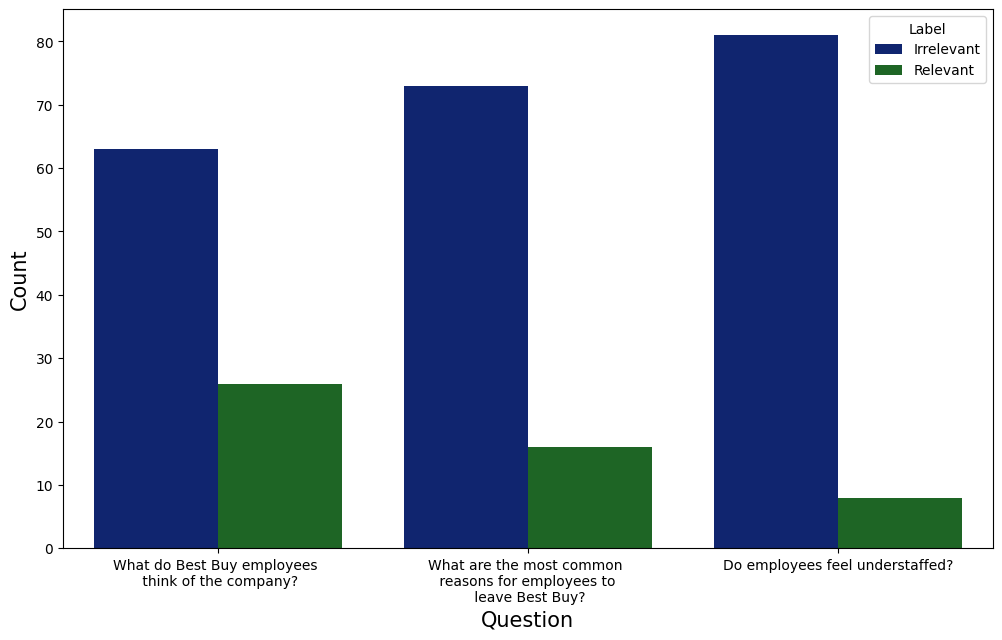

In [491]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def wrap_text(text, n_words = 5, indent = ''):
    """
    Wrap text with a newline character every n_words with an 
    optional indent on each line

    inputs:
        -text: string to be wrapped into multiple lines
        -n_words: the max number of words in a line
        -indent: the string indent on subsecuent lines (Examples: '    ', '\t')
    """
    sent = text.split(' ')
    for i in range(n_words, len(sent), n_words):
        sent.insert(i, '\n'+indent)
    return ' '.join(sent)

color_palette = sns.color_palette("dark")
color_palette.pop(1)
# Calculate the total count of 0s and 1s for each column
counts = labeled_set_df[test_questions].apply(lambda x: x.value_counts())
df = pd.DataFrame()
for question in counts.columns:
    temp_df = counts.reset_index(names=['Label'])[['Label',question]].rename(columns={question:'Count'})
    temp_df['Question'] = wrap_text(question)
    df = pd.concat((df, temp_df))
df = df.replace({0:'Irrelevant', 1:'Relevant'})


# Create a bar plot using seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='Question', y='Count', hue = 'Label', data = df, palette=color_palette)
plt.xlabel('Question', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [463]:
counts.stack()

0  Label                                                                Irrelevant
   What do Best Buy employees think of the company?                             63
   What are the most common reasons for employees to leave Best Buy?            73
   Do employees feel understaffed?                                              81
1  Label                                                                  Relevant
   What do Best Buy employees think of the company?                             26
   What are the most common reasons for employees to leave Best Buy?            16
   Do employees feel understaffed?                                               8
dtype: object

In [462]:
temp_df = pd.concat((counts[['Label',question]] for question in list(set(counts.columns) - {'Label'})), axis=0)
temp_df

Label  \
0  Irrelevant   
1    Relevant   
0  Irrelevant   
1    Relevant   
0  Irrelevant   
1    Relevant   

   What are the most common reasons for employees to leave Best Buy?  \
0                                               73.0                   
1                                               16.0                   
0                                                NaN                   
1                                                NaN                   
0                                                NaN                   
1                                                NaN                   

   What do Best Buy employees think of the company?  \
0                                               NaN   
1                                               NaN   
0                                              63.0   
1                                              26.0   
0                                               NaN   
1                                               NaN   

   Do employees feel understaffed?  
0                              NaN  
1                              NaN  
0                              NaN  
1                              NaN  
0                             81.0  
1                              8.0

In [458]:
sample_summary = pd.concat((counts.iloc[0], counts.iloc[1]), axis=1).T.set_index('Label').T.reset_index().rename(columns={'Label':'Question'})

In [469]:
df0 = sample_summary[['index','Irrelevant']].rename(columns = {'index':'Question', 'Irrelevant': 'Count'})
df0['Label'] = 'Irrelevant'
df1 = sample_summary[['index','Relevant']].rename(columns = {'index':'Question', 'Relevant': 'Count'})
df1['Label'] = 'Relevant'
df_summary = pd.concat((df0,df1),axis=0)

df_summary['Question'] = df_summary['Question'].apply(wrap_text)
df_summary

Label                                           Question Count       Label
0      What do Best Buy employees \n think of the com...    63  Irrelevant
1      What are the most common \n reasons for employ...    73  Irrelevant
2                        Do employees feel understaffed?    81  Irrelevant
0      What do Best Buy employees \n think of the com...    26    Relevant
1      What are the most common \n reasons for employ...    16    Relevant
2                        Do employees feel understaffed?     8    Relevant

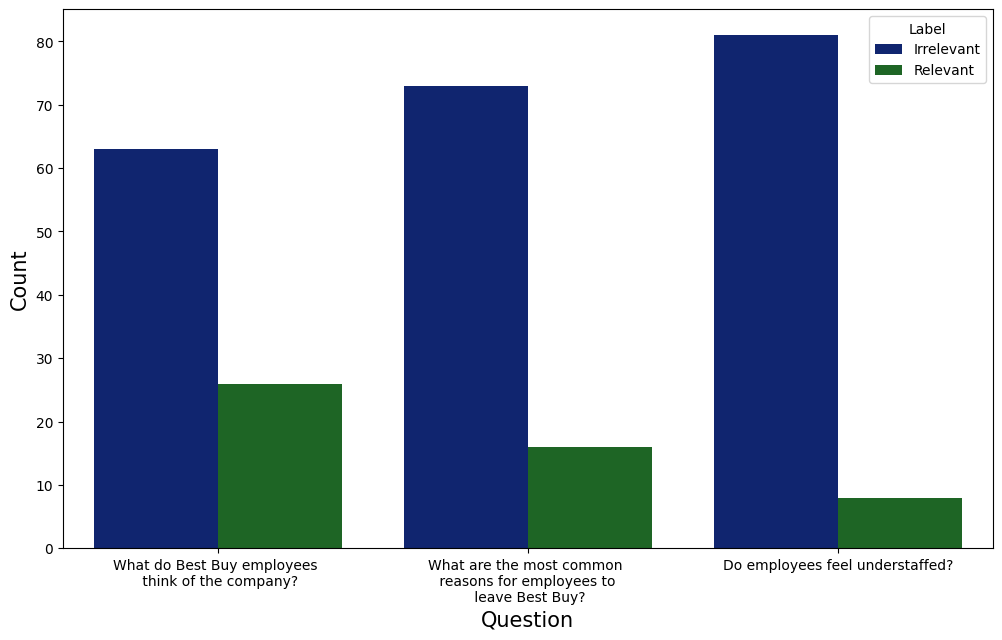

In [472]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


color_palette = sns.color_palette("dark")
color_palette.pop(1)
# Calculate the total count of 0s and 1s for each column
counts = labeled_set_df[test_questions].apply(lambda x: x.value_counts())

# Create a bar plot using seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x='Question', y='Count', hue = 'Label', data = df_summary, palette=color_palette)
plt.xlabel('Question', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [476]:
df_out1

f1    recall  precision             embedding model  \
0   0.258065  0.153846   0.800000           all-mpnet-base-v1   
1   0.193548  0.115385   0.600000  multi-qa-mpnet-base-cos-v1   
2   0.258065  0.153846   0.800000   multi-qa-MiniLM-L6-cos-v1   
3   0.193548  0.115385   0.600000                gtr-t5-large   
4   0.322581  0.192308   1.000000    paraphrase-mpnet-base-v2   
..       ...       ...        ...                         ...   
67  0.368421  0.875000   0.233333  multi-qa-mpnet-base-cos-v1   
68  0.421053  1.000000   0.266667   multi-qa-MiniLM-L6-cos-v1   
69  0.421053  1.000000   0.266667                gtr-t5-large   
70  0.368421  0.875000   0.233333    paraphrase-mpnet-base-v2   
71  0.421053  1.000000   0.266667        all-distilroberta-v1   

                                            question  retrieved_docs  
0   What do Best Buy employees think of the company?               5  
1   What do Best Buy employees think of the company?               5  
2   What do Best Buy employees think of the company?               5  
3   What do Best Buy employees think of the company?               5  
4   What do Best Buy employees think of the company?               5  
..                                               ...             ...  
67                   Do employees feel understaffed?              30  
68                   Do employees feel understaffed?              30  
69                   Do employees feel understaffed?              30  
70                   Do employees feel understaffed?              30  
71                   Do employees feel understaffed?              30  

[72 rows x 6 columns]

In [480]:
df_out1.drop(columns=['question']).groupby(['embedding model']).agg(['mean', 'std'])

f1              recall           precision  \
                                mean       std      mean       std      mean   
embedding model                                                                
all-distilroberta-v1        0.513977  0.139292  0.578926  0.280922  0.612500   
all-mpnet-base-v1           0.534543  0.145804  0.588141  0.248587  0.640278   
gtr-t5-large                0.486443  0.167407  0.562901  0.308207  0.547222   
multi-qa-MiniLM-L6-cos-v1   0.461464  0.157010  0.534856  0.296417  0.529167   
multi-qa-mpnet-base-cos-v1  0.476478  0.155517  0.531651  0.246116  0.552778   
paraphrase-mpnet-base-v2    0.533800  0.149958  0.592548  0.263114  0.634722   

                                     retrieved_docs             
                                 std           mean        std  
embedding model                                                 
all-distilroberta-v1        0.221693          16.25  10.028369  
all-mpnet-base-v1           0.230224          16.25  10.028369  
gtr-t5-large                0.162809          16.25  10.028369  
multi-qa-MiniLM-L6-cos-v1   0.176973          16.25  10.028369  
multi-qa-mpnet-base-cos-v1  0.177928          16.25  10.028369  
paraphrase-mpnet-base-v2    0.220475          16.25  10.028369

In [479]:
df_out1.drop(columns=['question']).groupby(['embedding model', 'retrieved_docs']).agg(['mean', 'std'])

f1              recall  \
                                               mean       std      mean   
embedding model            retrieved_docs                                 
all-distilroberta-v1       5               0.407893  0.180636  0.293269   
                           10              0.517094  0.141801  0.469551   
                           20              0.593053  0.051812  0.733974   
                           30              0.537866  0.155438  0.818910   
all-mpnet-base-v1          5               0.469416  0.266818  0.342949   
                           10              0.568376  0.087267  0.511218   
                           20              0.545434  0.112144  0.650641   
                           30              0.554947  0.129066  0.847756   
gtr-t5-large               5               0.333136  0.244439  0.246795   
                           10              0.431624  0.037984  0.381410   
                           20              0.611571  0.040375  0.754808   
                           30              0.569440  0.133172  0.868590   
multi-qa-MiniLM-L6-cos-v1  5               0.252078  0.058837  0.176282   
                           10              0.498575  0.148613  0.456731   
                           20              0.554750  0.054352  0.679487   
                           30              0.540454  0.129775  0.826923   
multi-qa-mpnet-base-cos-v1 5               0.364882  0.221782  0.267628   
                           10              0.505698  0.144058  0.464744   
                           20              0.526915  0.114205  0.629808   
                           30              0.508418  0.157259  0.764423   
paraphrase-mpnet-base-v2   5               0.356611  0.092720  0.251603   
                           10              0.594017  0.085363  0.532051   
                           20              0.620773  0.105592  0.746795   
                           30              0.563801  0.177249  0.839744   

                                                    precision            
                                                std      mean       std  
embedding model            retrieved_docs                                
all-distilroberta-v1       5               0.179050  0.800000  0.200000  
                           10              0.243458  0.666667  0.208167  
                           20              0.231636  0.550000  0.180278  
                           30              0.162065  0.433333  0.208167  
all-mpnet-base-v1          5               0.248950  0.866667  0.115470  
                           10              0.211775  0.733333  0.152753  
                           20              0.089342  0.516667  0.225462  
                           30              0.138035  0.444444  0.183586  
gtr-t5-large               5               0.219335  0.600000  0.200000  
                           10              0.115518  0.566667  0.152753  
                           20              0.219423  0.566667  0.175594  
                           30              0.134730  0.455556  0.183586  
multi-qa-MiniLM-L6-cos-v1  5               0.065451  0.533333  0.230940  
                           10              0.253990  0.633333  0.152753  
                           20              0.174760  0.516667  0.175594  
                           30              0.150197  0.433333  0.185592  
multi-qa-mpnet-base-cos-v1 5               0.204445  0.666667  0.115470  
                           10              0.252636  0.633333  0.057735  
                           20              0.104339  0.500000  0.229129  
                           30              0.098176  0.411111  0.203670  
paraphrase-mpnet-base-v2   5               0.106892  0.733333  0.230940  
                           10              0.203822  0.766667  0.152753  
                           20              0.129837  0.583333  0.225462  
                           30              0.061066  0.455556  0.216880

In [ ]:
0.47 +/- 0.27
0.55 +/- 0.13

0.36 +/- 0.22
0.56 +/- 0.18

Text(0, 0.5, 'F1 Score')

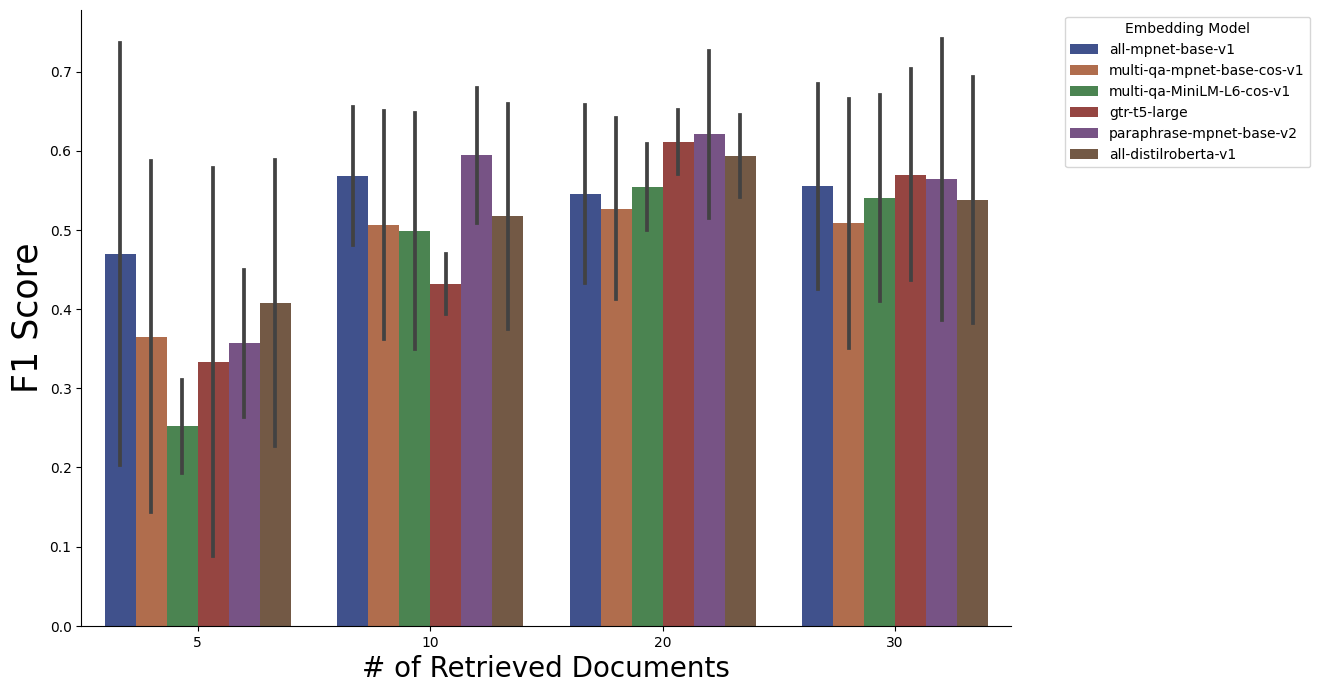

In [439]:
# Plot df_summary
evaluation_metric = 'f1'

color_palette = sns.color_palette("dark")
#color_palette.pop(1)
#color_palette.pop(1)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="retrieved_docs", y=evaluation_metric, hue="embedding model",
    data=df_out1, errorbar='sd', palette=color_palette, alpha=0.8)
ax.spines[['right', 'top']].set_visible(False)
plt.legend(title='Embedding Model',
            bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('# of Retrieved Documents', fontsize=20)
plt.ylabel('F1 Score', fontsize=25)

In [342]:
retr = ClusterRetriever(
    test_docs, 
    'all-mpnet-base-v1', 
    'cosine-similarity',
    clusters = cluster_labels,
    cluster_docs = all_docs,
    clustered_embeddings = embeddings
)

In [343]:
retr.load_documents()

In [339]:
test_questions = labeled_set_df.question.unique()
label_dict = {question:labeled_set_df[question].values for question in test_questions}

In [373]:
outputs = []
n_docs = 10
for n_docs in [5,10,20, 30]:
    for question in test_questions:
        retrieved_documents = retr.retrieve(question, 0.5, n=n_docs)
        outputs.append(calc_quality_measures(labeled_set_df, retrieved_documents, question)| {'method': 'cluster', 'question': question, 'retrieved_docs':n_docs})
        custom_docs = custom_retr.retrieve(question, n=n_docs)
        outputs.append(calc_quality_measures(labeled_set_df, custom_docs, question)| {'method': 'custom', 'question': question, 'retrieved_docs':n_docs})    
df_out = pd.DataFrame(outputs)

f1    recall  precision   method  \
0   0.322581  0.192308   1.000000  cluster   
1   0.258065  0.153846   0.800000   custom   
2   0.476190  0.312500   1.000000  cluster   
3   0.380952  0.250000   0.800000   custom   
4   0.666667  0.500000   1.000000  cluster   
5   0.769231  0.625000   1.000000   custom   
6   0.500000  0.346154   0.900000  cluster   
7   0.500000  0.346154   0.900000   custom   
8   0.538462  0.437500   0.700000  cluster   
9   0.538462  0.437500   0.700000   custom   
10  0.666667  0.500000   1.000000  cluster   
11  0.666667  0.750000   0.600000   custom   
12  0.585366  0.461538   0.800000  cluster   
13  0.652174  0.576923   0.750000   custom   
14  0.571429  0.500000   0.666667  cluster   
15  0.555556  0.625000   0.500000   custom   
16  0.666667  0.500000   1.000000  cluster   
17  0.428571  0.750000   0.300000   custom   
18  0.585366  0.461538   0.800000  cluster   
19  0.678571  0.730769   0.633333   custom   
20  0.571429  0.500000   0.666667  cluster   
21  0.565217  0.812500   0.433333   custom   
22  0.666667  0.500000   1.000000  cluster   
23  0.421053  1.000000   0.266667   custom   

                                             question  retrieved_docs  
0    What do Best Buy employees think of the company?               5  
1    What do Best Buy employees think of the company?               5  
2   What are the most common reasons for employees...               5  
3   What are the most common reasons for employees...               5  
4                     Do employees feel understaffed?               5  
5                     Do employees feel understaffed?               5  
6    What do Best Buy employees think of the company?              10  
7    What do Best Buy employees think of the company?              10  
8   What are the most common reasons for employees...              10  
9   What are the most common reasons for employees...              10  
10                    Do employees feel understaffed?              10  
11                    Do employees feel understaffed?              10  
12   What do Best Buy employees think of the company?              20  
13   What do Best Buy employees think of the company?              20  
14  What are the most common reasons for employees...              20  
15  What are the most common reasons for employees...              20  
16                    Do employees feel understaffed?              20  
17                    Do employees feel understaffed?              20  
18   What do Best Buy employees think of the company?              30  
19   What do Best Buy employees think of the company?              30  
20  What are the most common reasons for employees...              30  
21  What are the most common reasons for employees...              30  
22                    Do employees feel understaffed?              30  
23                    Do employees feel understaffed?              30

In [379]:
df_out = pd.DataFrame(outputs)
df_summary = df_out.drop(columns=['question']).groupby(['retrieved_docs', 'method']).agg({''}).rename({'custom':'naive'}).rename(columns={'method':'Method'})

In [426]:
df_out.replace({'custom':'Naive', 'cluster':'Cluster'})

f1    recall  precision   method  \
0   0.322581  0.192308   1.000000  Cluster   
1   0.258065  0.153846   0.800000    Naive   
2   0.476190  0.312500   1.000000  Cluster   
3   0.380952  0.250000   0.800000    Naive   
4   0.666667  0.500000   1.000000  Cluster   
5   0.769231  0.625000   1.000000    Naive   
6   0.500000  0.346154   0.900000  Cluster   
7   0.500000  0.346154   0.900000    Naive   
8   0.538462  0.437500   0.700000  Cluster   
9   0.538462  0.437500   0.700000    Naive   
10  0.666667  0.500000   1.000000  Cluster   
11  0.666667  0.750000   0.600000    Naive   
12  0.585366  0.461538   0.800000  Cluster   
13  0.652174  0.576923   0.750000    Naive   
14  0.571429  0.500000   0.666667  Cluster   
15  0.555556  0.625000   0.500000    Naive   
16  0.666667  0.500000   1.000000  Cluster   
17  0.428571  0.750000   0.300000    Naive   
18  0.585366  0.461538   0.800000  Cluster   
19  0.678571  0.730769   0.633333    Naive   
20  0.571429  0.500000   0.666667  Cluster   
21  0.565217  0.812500   0.433333    Naive   
22  0.666667  0.500000   1.000000  Cluster   
23  0.421053  1.000000   0.266667    Naive   

                                             question  retrieved_docs  
0    What do Best Buy employees think of the company?               5  
1    What do Best Buy employees think of the company?               5  
2   What are the most common reasons for employees...               5  
3   What are the most common reasons for employees...               5  
4                     Do employees feel understaffed?               5  
5                     Do employees feel understaffed?               5  
6    What do Best Buy employees think of the company?              10  
7    What do Best Buy employees think of the company?              10  
8   What are the most common reasons for employees...              10  
9   What are the most common reasons for employees...              10  
10                    Do employees feel understaffed?              10  
11                    Do employees feel understaffed?              10  
12   What do Best Buy employees think of the company?              20  
13   What do Best Buy employees think of the company?              20  
14  What are the most common reasons for employees...              20  
15  What are the most common reasons for employees...              20  
16                    Do employees feel understaffed?              20  
17                    Do employees feel understaffed?              20  
18   What do Best Buy employees think of the company?              30  
19   What do Best Buy employees think of the company?              30  
20  What are the most common reasons for employees...              30  
21  What are the most common reasons for employees...              30  
22                    Do employees feel understaffed?              30  
23                    Do employees feel understaffed?              30

In [482]:
df_out.sort_values('method', ascending=False).replace({'custom':'Naive', 'cluster':'Cluster'}).drop(column=['question']).groupby(['method', 'retrieved docs']).agg(['mean','std'])

TypeError: DataFrame.drop() got an unexpected keyword argument 'column'

Text(0, 0.5, 'F1 Score')

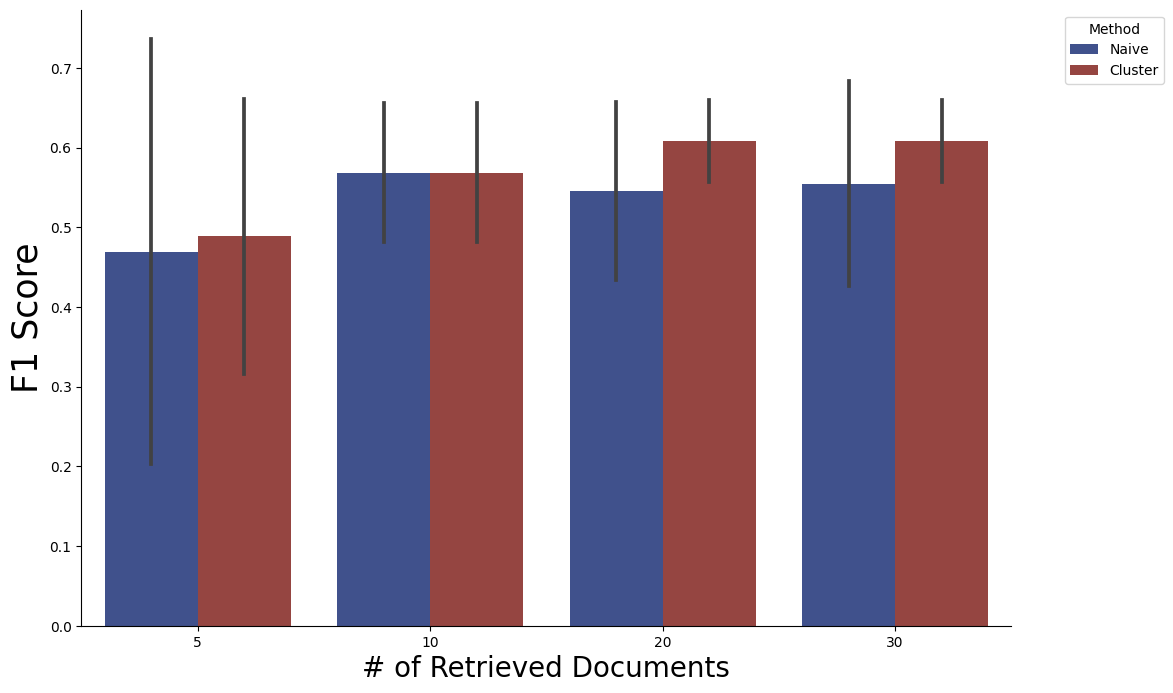

In [474]:
# Plot df_summary
evaluation_metric = 'f1'

color_palette = sns.color_palette("dark")
color_palette.pop(1)
color_palette.pop(1)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="retrieved_docs", y=evaluation_metric, hue="method",
    data=df_out.sort_values('method', ascending=False).replace({'custom':'Naive', 'cluster':'Cluster'}), errorbar='sd', palette=color_palette, alpha=0.8)
ax.spines[['right', 'top']].set_visible(False)
plt.legend(title='Method',
            bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('# of Retrieved Documents', fontsize=20)
plt.ylabel('F1 Score', fontsize=25)

In [349]:
test_docs_df

reddit_id                                          statement  \
0    ju59a0l                        ![gif](giphy|znRstrOYuirrW)   
1    hhgbgps                                #shockedpikachuface   
2    iwshpu5               12 hr shift here too. Normal pay man   
3     klk0z1  12-day Application Review; What is the usual d...   
4    ibg921p  Absolutely. I had a talk with a leader last we...   
..       ...                                                ...   
84   k01yx5z  done company wide every March not on your work...   
85   ki7m0f4  i take only cash tips from anyone thats not a ...   
86   jag8nz0  i've been here for 8 years, work in the highes...   
87   ixd7txp                                                nah   
88   ktjzlgp                        thank you ! i wish you well   

   reddit_subreddit                                   reddit_permalink  \
0    BestBuyWorkers  /r/BestBuyWorkers/comments/15e1vvl/customer_po...   
1    BestBuyWorkers  /r/BestBuyWorkers/comments/qafhhx/we_can_impro...   
2    BestBuyWorkers  /r/BestBuyWorkers/comments/yy085z/black_friday...   
3    BestBuyWorkers  /r/BestBuyWorkers/comments/klk0z1/12day_applic...   
4    BestBuyWorkers  /r/BestBuyWorkers/comments/v5thte/what_are_som...   
..              ...                                                ...   
84   BestBuyWorkers  /r/BestBuyWorkers/comments/16fik5c/so_are_annu...   
85   BestBuyWorkers  /r/BestBuyWorkers/comments/198a0ow/customer_ti...   
86   BestBuyWorkers  /r/BestBuyWorkers/comments/11dxaol/new_to_this...   
87   BestBuyWorkers  /r/BestBuyWorkers/comments/z1mzn6/bf_walk_out/...   
88   BestBuyWorkers  /r/BestBuyWorkers/comments/1b7n0jo/achievers/k...   

       aware_created_ts reddit_parent_id aware_post_type reddit_link_id  
0   2023-07-30T21:11:35       t3_15e1vvl         comment     t3_15e1vvl  
1   2021-10-21T00:06:32       t1_hh3zf24         comment      t3_qafhhx  
2   2022-11-17T19:35:11        t3_yy085z         comment      t3_yy085z  
3   2020-12-28T00:22:54             None      submission           None  
4   2022-06-07T00:11:03       t1_ibd38u3         comment      t3_v5thte  
..                  ...              ...             ...            ...  
84  2023-09-10T21:51:15       t3_16fik5c         comment     t3_16fik5c  
85  2024-01-16T19:53:41       t3_198a0ow         comment     t3_198a0ow  
86  2023-03-01T00:13:02       t3_11dxaol         comment     t3_11dxaol  
87  2022-11-22T10:51:56        t3_z1mzn6         comment      t3_z1mzn6  
88  2024-03-05T22:00:47       t1_ktjzis4         comment     t3_1b7n0jo  

[89 rows x 8 columns]

In [355]:
df_pred = pd.DataFrame([parse_retriever_element(elem) for elem in retrieved_documents])
df_pred['retrieved'] = 1
df_pred


statement     score reddit_id  \
0  And one last thing: have an open mind. Best Bu...  0.620727   kie231y   
1  My bestbuy doesn’t care about the cashiers at ...  0.540368   iwnipy5   
2  Best Buy is running out of good reasons for pe...  0.590640   hibszui   
3  Well, I worked there for 4 years. 3 of being i...  0.639815   hudxu80   
4  Best Buy used to be a great company to work fo...  0.727204   ii2qrid   
5  Had a similar experience with a GM that the co...  0.580315   gal7thm   
6                        Life as a Best Buy worker 💀  0.629114   134bzme   
7  Being a veteran and Best Buy employee, I can s...  0.639146   kiebi0d   
8  Best Buy doesn’t want salesmen anymore. Old sc...  0.580471   jt8o8kf   
9  Don’t listen to this guy, I work there and the...  0.706477   iw9vtz5   

  reddit_subreddit                                   reddit_permalink  \
0   BestBuyWorkers  /r/BestBuyWorkers/comments/199f5h8/left_best_b...   
1   BestBuyWorkers  /r/BestBuyWorkers/comments/ywjf2p/up_front/iwn...   
2   BestBuyWorkers  /r/BestBuyWorkers/comments/qhb9v1/i_wonder_if_...   
3   BestBuyWorkers  /r/BestBuyWorkers/comments/qpi3rj/really_need_...   
4   BestBuyWorkers  /r/BestBuyWorkers/comments/wapsy3/new_hire_pos...   
5   BestBuyWorkers  /r/BestBuyWorkers/comments/j5vbke/retaliation_...   
6   BestBuyWorkers  /r/BestBuyWorkers/comments/134bzme/life_as_a_b...   
7   BestBuyWorkers  /r/BestBuyWorkers/comments/199f5h8/left_best_b...   
8   BestBuyWorkers  /r/BestBuyWorkers/comments/1580byk/if_membersh...   
9   BestBuyWorkers  /r/BestBuyWorkers/comments/yuacvb/looking_to_g...   

      aware_created_ts reddit_parent_id aware_post_type reddit_link_id  \
0  2024-01-17T23:11:41       t3_199f5h8         comment     t3_199f5h8   
1  2022-11-16T18:12:41       t1_iwn24w0         comment      t3_ywjf2p   
2  2021-10-27T21:46:40       t1_hibnuwh         comment      t3_qhb9v1   
3  2022-01-26T21:42:39       t1_huddqx5         comment      t3_qpi3rj   
4  2022-07-28T22:28:52       t1_ii2q1fr         comment      t3_wapsy3   
5  2020-10-30T07:09:24        t3_j5vbke         comment      t3_j5vbke   
6  2023-04-30T23:58:58             None      submission           None   
7  2024-01-18T00:29:32       t1_kie0t0j         comment     t3_199f5h8   
8  2023-07-24T08:20:30       t1_jt7yvte         comment     t3_1580byk   
9  2022-11-13T20:26:31       t1_iw8gy71         comment      t3_yuacvb   

   retrieved  
0          1  
1          1  
2          1  
3          1  
4          1  
5          1  
6          1  
7          1  
8          1  
9          1

In [356]:
eval_df = labeled_set_df.drop_duplicates()[['statement',question]].rename(columns={question:'label'}).merge(df_pred, how = 'outer', on='statement').fillna(0)

In [363]:
custom_retr = CustomRetriever(test_docs, 'all-mpnet-base-v1', 'cosine-similarity')

In [364]:
custom_retr.load_documents()

In [365]:
custom_docs = custom_retr.retrieve(question)

In [367]:
df_pred1 = pd.DataFrame([parse_retriever_element(elem) for elem in custom_docs])
df_pred1['retrieved'] = 1

In [368]:
eval_df1 = labeled_set_df.drop_duplicates()[['statement',question]].rename(columns={question:'label'}).merge(df_pred1, how = 'outer', on='statement').fillna(0)

In [ ]:
df_pred = pd.DataFrame([parse_retriever_element(elem) for elem in retrieved_documents])
df_pred['retrieved'] = 1

In [358]:
from sklearn.metrics import f1_score, recall_score, precision_score

## 

In [359]:

f1 = f1_score(eval_df['label'], eval_df['retrieved'])
recall = recall_score(eval_df['label'], eval_df['retrieved'])
precision = precision_score(eval_df['label'], eval_df['retrieved'])
print(f1, recall, precision)

0.5 0.34615384615384615 0.9


In [369]:

f1 = f1_score(eval_df1['label'], eval_df1['retrieved'])
recall = recall_score(eval_df1['label'], eval_df1['retrieved'])
precision = precision_score(eval_df1['label'], eval_df1['retrieved'])
print(f1, recall, precision)

0.5 0.34615384615384615 0.9


In [357]:
eval_df

statement  label  score reddit_id  \
0                         ![gif](giphy|znRstrOYuirrW)    0.0    0.0         0   
1                                 #shockedpikachuface    0.0    0.0         0   
2                12 hr shift here too. Normal pay man    0.0    0.0         0   
3   12-day Application Review; What is the usual d...    0.0    0.0         0   
4   Absolutely. I had a talk with a leader last we...    1.0    0.0         0   
..                                                ...    ...    ...       ...   
85  done company wide every March not on your work...    0.0    0.0         0   
86  i take only cash tips from anyone thats not a ...    0.0    0.0         0   
87  i've been here for 8 years, work in the highes...    1.0    0.0         0   
88                                                nah    0.0    0.0         0   
89                        thank you ! i wish you well    0.0    0.0         0   

   reddit_subreddit reddit_permalink aware_created_ts reddit_parent_id  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   
..              ...              ...              ...              ...   
85                0                0                0                0   
86                0                0                0                0   
87                0                0                0                0   
88                0                0                0                0   
89                0                0                0                0   

   aware_post_type reddit_link_id  retrieved  
0                0              0        0.0  
1                0              0        0.0  
2                0              0        0.0  
3                0              0        0.0  
4                0              0        0.0  
..             ...            ...        ...  
85               0              0        0.0  
86               0              0        0.0  
87               0              0        0.0  
88               0              0        0.0  
89               0              0        0.0  

[90 rows x 11 columns]

In [217]:
query_embedding = retr.encoder.encode('all-mpnet-base-v1')


In [276]:
sorted_clusters = retr.get_sorted_clusters(query_embedding)
sorted_clusters

tensor([  0, 475, 476, 477, 478, 479, 480, 481, 482, 474, 483, 485, 486, 487,
        488, 489, 490, 491, 492, 484, 473, 472, 471, 452, 453, 454, 455, 456,
        457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470,
        493, 451, 494, 496, 520, 521, 522, 523, 524, 525, 526, 527, 519, 528,
        530, 531, 532, 533, 534, 535, 536, 537, 529, 518, 517, 516, 497, 498,
        499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512,
        513, 514, 515, 495, 538, 450, 448, 385, 386, 387, 388, 389, 390, 391,
        392, 384, 393, 395, 396, 397, 398, 399, 400, 401, 402, 394, 383, 382,
        381, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
        375, 376, 377, 378, 379, 380, 403, 449, 404, 406, 430, 431, 432, 433,
        434, 435, 436, 437, 429, 438, 440, 441, 442, 443, 444, 445, 446, 447,
        439, 428, 427, 426, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
        417, 418, 419, 420, 421, 422, 423, 424, 425, 405, 361, 5

In [277]:
distance_cutoff = 0.1

In [244]:
cluster_label = 454

In [255]:
pd.DataFrame({'label':self.doc_cluster_labels}).value_counts()

label
636      2
132      2
248      2
88       2
8        1
        ..
206      1
199      1
194      1
171      1
711      1
Name: count, Length: 85, dtype: int64

In [257]:
np.array(self.documents)[self.doc_cluster_labels == cluster_label]

array([Document(page_content="Nope you can't go to any best buy any more your screwed every one at every best buy will what you did!  Sorry man.", metadata={'reddit_id': 'iy83swq', 'reddit_subreddit': 'BestBuyWorkers', 'reddit_permalink': '/r/BestBuyWorkers/comments/z7kfmo/can_i_go_back_to_best_buy/iy83swq/', 'aware_created_ts': '2022-11-29T08:34:24', 'reddit_parent_id': 't3_z7kfmo', 'aware_post_type': 'comment', 'reddit_link_id': 't3_z7kfmo'})],
      dtype=object)

In [264]:
print(question)

What do Best Buy employees think of the company?


In [283]:
max_n = 10
cluster_label = 8
distance_cutoff = -1
self = retr
cluster_docs = np.array(self.documents)[self.doc_cluster_labels == cluster_label]
cluster_embeddings = np.array(self.embeddings)[self.doc_cluster_labels == cluster_label,:]
scores = self.metric(query_embedding, cluster_embeddings)[0]
if self.similarity_name != 'euclidian':
    scores = scores.numpy()
sorted_idxs = np.argsort(scores)
out = [
    {
        'document': cluster_docs[i],
        'score': scores[i]
    }
    for i in sorted_idxs[:max_n] if self.compare_score(scores[i], distance_cutoff)
]
out

[{'document': Document(page_content='[deleted]', metadata={'reddit_id': 'hyhv4d6', 'reddit_subreddit': 'BestBuyWorkers', 'reddit_permalink': '/r/BestBuyWorkers/comments/t1if6w/alienware_computing_sales/hyhv4d6/', 'aware_created_ts': '2022-02-26T04:09:32', 'reddit_parent_id': 't3_t1if6w', 'aware_post_type': 'comment', 'reddit_link_id': 't3_t1if6w'}),
  'score': 0.011453295}]

In [284]:
self.metric(query_embedding, cluster_embeddings).numpy()[0]

array([0.0114533], dtype=float32)

In [262]:
scores

array([-0.06038858, -0.00731577], dtype=float32)

In [250]:
np.where(self.doc_cluster_labels == cluster_label)[0]

array([50], dtype=int64)

In [251]:
self.embeddings.shape

AttributeError: 'list' object has no attribute 'shape'

In [254]:
cluster_label

454

In [253]:
np.shape(np.array(self.embeddings)[self.doc_cluster_labels == cluster_label,:])

(1, 768)

In [229]:
self.documents[]

TypeError: only integer scalar arrays can be converted to a scalar index

In [227]:
self.doc_cluster_labels

array([366, 410, 587, 402, 646, 199, 446, 228, 287, 227, 466,  56, 248,
       136, 212,  42, 689, 666, 674,  78, 296, 557, 607, 650,  98, 382,
       636, 292, 112, 194, 244, 144, 458, 209, 336, 403, 570, 614,  93,
       414, 340,  59, 286, 132, 255,  88, 461, 676,  92,  35, 454, 231,
        88, 562, 432, 649,  50,  31, 640,  72, 636,  83, 134, 347, 171,
        33,  85, 658, 527, 132, 206, 450, 711, 428, 236, 150, 237, 332,
        53,  97,   8, 345,  30, 380, 248, 653, 353, 430, 384], dtype=int64)

In [226]:
cluster_docs

NameError: name 'cluster_docs' is not defined